## Packages + Functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [3]:
import matplotlib.patches as mpatches


In [4]:
import seaborn as sb

In [5]:
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

In [6]:
import statsmodels.api as sm

In [7]:
import scipy.stats as sp

In [8]:
import altair as alt

In [9]:
from datetime import datetime, timedelta

In [10]:
from collections import Counter

In [11]:
import my_functions as mf

In [12]:
def donor(df, x):
    return df[df['DONOR_ID'] == x]

In [13]:
def pt(df, x):
    return df[df['wl_id_code'] == x]

In [14]:
def dri(s):
    age = s['AGE_DON']
    if (age >= 40) & (age<50):
        dri1 = 0.154
    elif (age >= 50) & (age<60):
        dri1 = 0.274
    elif (age >= 60) & (age<70):
        dri1 = 0.424
    elif age >= 70:
        dri1 = 0.501
    else:
        dri1=0
    cod = s['COD_CAD_DON']
    if cod ==1:
        dri2 = 0.079
    elif cod==2:
        dri2 = 0.145
    else:
        dri2 = 0.184
    eth = s['ETHCAT_DON']
    if eth ==2:
        dri3 = 0.176
    else:
        dri3 = 0.126
    dcd = s['NON_HRT_DON']
    if dcd == 'Y':
        dri4 = 0.411
    else:
        dri4 =0
    ty = s['TXLIV']
    if ty != 'W':
        dri5 = 0.422
    else:
        dri5 = 0
    ci = s['COLD_ISCH']
    ht = s['HGT_CM_DON_CALC']
    share = s['SHARE_TY']
    if share == 4:
        dri6 = 0.105
    elif share == 5:
        dri6 = 0.244
    else:
        dri6 = 0
    calc_dri = math.e **(
        dri1 + dri2 + dri3 + dri4 + dri5 + (0.066*((170-ht)/10)) + dri6 + (0.01 * ci)
    )
    return calc_dri
    
    

In [15]:
def tx(df, x):
    return df.query('TX == @x')

In [16]:
def ep(df, x):
    return df[df['EP'] == x]

In [17]:
def disc(df, x):
    return df[df['DISC'] == x]

In [18]:
import math
def factorize(n):
    factors = set()
    for i in range(1, int(math.isqrt(n)) + 1):
        if n % i == 0:
            factors.add(i)
            factors.add(n // i)
    return sorted(factors)

In [19]:
def per(x):
    if x > 1:
        return f'{x:.2f}%'
    else:
        return ''

In [20]:
def closest_to_threshold(tup, threshold):
    # Unpack the tuple
    num1, num2 = tup
    
    # Check if the threshold is between the two numbers
    if min(num1, num2) <= threshold <= max(num1, num2):
        # Calculate the absolute difference between each number and the threshold
        diff1 = abs(num1 - threshold)
        diff2 = abs(num2 - threshold)
        
        # Return the number that is closer to the threshold
        if diff1 < diff2:
            return num1
        else:
            return num2
    else:
        return None

In [21]:
def ctrs(ctr_list, per):
    ctr_counter = Counter(ctr_list)
    per_freq = [round(x/len(ctr_list)*100, 2) for x in ctr_counter.values()]
    ctrs = {k:v for k,v in zip(ctr_counter.keys(), per_freq)}
    for i in range(len(ctr_list)):
        num1 = sum(sorted(ctrs.values(), reverse=True)[:i])
        num2 = sum(sorted(ctrs.values(), reverse=True)[:i+1])
        center_per_m = (i/ctr_list.unique().size)*100
        center_per_p = ((i+1)/ctr_list.unique().size)*100
        num_placement_m = sum(sorted(ctr_counter.values(), reverse=True)[:i])
        num_placement_p = sum(sorted(ctr_counter.values(), reverse=True)[:i+1])
        if min(num1, num2) <= per <= max(num1, num2):
            # Calculate the absolute difference between each number and the threshold
            diff1 = abs(num1 - per)
            diff2 = abs(num2 - per)
            
            # Return the number that is closer to the threshold
            if diff1 < diff2:
                per_placement = num1
                num_placement = num_placement_m
                center_per = center_per_m
                n=i
            else:
                per_placement = num2
                num_placement = num_placement_p
                center_per = center_per_p
                n=i+1
                
            break
        else:
            pass
        

        
    print(f'{n} / {(ctr_list.unique().size)} ({center_per:.2f}%) Centers accepted {per_placement:.3f}% ({num_placement} livers) of all transplanted EP grafts')

In [22]:
def opos(ctr_list, per):
    ctr_counter = Counter(ctr_list)
    per_freq = [round(x/len(ctr_list)*100, 2) for x in ctr_counter.values()]
    ctrs = {k:v for k,v in zip(ctr_counter.keys(), per_freq)}
    for i in range(len(ctr_list)):
        num1 = sum(sorted(ctrs.values(), reverse=True)[:i])
        num2 = sum(sorted(ctrs.values(), reverse=True)[:i+1])
        center_per_m = (i/ctr_list.unique().size)*100
        center_per_p = ((i+1)/ctr_list.unique().size)*100
        num_placement_m = sum(sorted(ctr_counter.values(), reverse=True)[:i])
        num_placement_p = sum(sorted(ctr_counter.values(), reverse=True)[:i+1])
        if min(num1, num2) <= per <= max(num1, num2):
            # Calculate the absolute difference between each number and the threshold
            diff1 = abs(num1 - per)
            diff2 = abs(num2 - per)
            
            # Return the number that is closer to the threshold
            if diff1 < diff2:
                per_placement = num1
                num_placement = num_placement_m
                center_per = center_per_m
                n=i
            else:
                per_placement = num2
                num_placement = num_placement_p
                center_per = center_per_p
                n=i+1
                
            break
        else:
            pass
        
    print(f'{n} / {(ctr_list.unique().size)} ({center_per:.2f}%) Opos placed {per_placement:.3f}%  ({num_placement} livers) of all transplanted EP grafts')

In [23]:
def char_ser(df, *, name, norm = [], skew = [], cats = [], multi_index=True, pub=False, export = False, filename = ''):
    values = {}
    n = df.shape[0]
    values['n'] = n
    ser_list = []
    key_count = {}
    if pub:
        multi_index = False
    for var in norm + skew:
        x = df[var].describe().round(2)
        if var in norm:
            mean = x.loc['mean']
            std = x.loc['std']
            values[var] = f'{mean} ({mean-(2*std):.2f}, {mean+(2*std):.2f})'
        elif var in skew:
            med = x.loc['50%']
            p25 = x.loc['25%']
            p75 = x.loc['75%']
            values[var] = f'{med} [{p25:.2f}, {p75:.2f}]'
    for col in cats:
        d={}
        d1={}
        counts = df[col].value_counts()
        per_freq = counts/counts.sum()
        text = [str(f) +' ('+str(round(p*100, 2)) + '%)' for f, p in zip(counts.values, per_freq.values)]
        if pub:
            d[col] = ''
            d1 = {k:v for k,v in zip(counts.index, text)}
            d.update(d1)
            for k, v in d.items():
                if k not in key_count:
                    key_count[k] = 0
                key_count[k] += 1
               
                if k in values:
                    key = str(k) + key_count[k]*' '
                else:
                    key = k
                values[key] = v
                
        elif multi_index:
            tuples = [(col, x) for x in counts.index]
            mi = pd.MultiIndex.from_tuples(tuples, names=['cat', 'var'])
            d = {k:v for k,v in zip(counts.index, text)}
            c_ser = pd.Series(d, name=name)
            c_ser.index = mi
            ser_list.append(c_ser)
        else:
            d = {col +' : ' +str(k):v for k,v in zip(counts.index, text)}
            values.update(d)
    ser = pd.Series(values, name=name)
    if multi_index:
        tupes = [('', i) for i in ser.index]
        ser.index = pd.MultiIndex.from_tuples(tupes, names=['cat', 'var'])
        ser_list.insert(0, ser)
        return pd.concat(ser_list)
    else:
        return ser
    

In [24]:
def p_fmt(p):
    thresholds = [(0.001, '<0.001'), (0.01, '<0.01'), (0.05, '<0.05')]
    return next((label for threshold, label in thresholds if p < threshold), f"{p:.2f}")

In [25]:
def stats(df_list, *, norm = [], cats = [], skew = []):
    d = {}
    cols = df_list[0].columns
    for var in norm+skew+cats:
        x = df_list[0][var].dropna()
        y = df_list[1][var].dropna()
        if var in skew:
            p = sp.mannwhitneyu(x, y).pvalue
            d[var] = p_fmt(p)
        if var in norm:
            p = sp.ttest_ind(x, y, nan_policy='omit').pvalue
            d[var] = p_fmt(p)
        if var in cats:
            counter1 = Counter(x.tolist())
            counter2 = Counter(y.tolist())
            obs = pd.DataFrame([counter1, counter2]).T.fillna(0)
            chi, p , deg_f, exp = sp.chi2_contingency(obs)
            d[var] = p_fmt(p)
    return pd.Series(d, name='p')

In [26]:
def stats_3(df_list, *, norm = [], cats = [], skew = []):
    d = {}
    for var in norm+skew+cats:
        z = [x[var].dropna() for x in df_list]
        if var in skew:
            p = sp.kruskal(*z, nan_policy='omit').pvalue
            d[var] = p_fmt(p)
        if var in norm:
            p = sp.f_oneway(*z).pvalue
            d[var] = p_fmt(p)
        if var in cats:
            counts = [Counter(x.tolist()) for x in z]
            obs = pd.DataFrame(counts).T.fillna(0)
            chi, p , deg_f, exp = sp.chi2_contingency(obs)
            d[var] = p_fmt(p)
    return pd.Series(d, name='p')

In [27]:
def char_table(df_dict, *,norm = [], cats = [], skew = [], multi_index=True,pub = False, export=False, filename=''):
    list = [char_ser(df, name=n, norm=norm, cats=cats, skew= skew, multi_index = multi_index, pub=pub, export=export, filename=filename) for n, df in df_dict.items()]
    conc = pd.concat(list, axis=1)
    if pub:
        p_values = stats_3(df_dict.values(), norm=norm, cats=cats, skew=skew)
        conc = pd.concat([conc, p_values], axis=1)
        conc = conc.fillna('')
    if export:
        try:
            conc.to_excel(filename)
        except ValueError as e:
            raise ValueError('Please input a filename with .xlsx extention if you wish to export')
            
    return conc
        

In [28]:
def offer_accept_r(df, ctr):
    cdf = df.query('LISTING_CTR_CODE' == ctr)
    a = cdf.query('OFFER_ACCEPT == "Y"').shape[0]
    o = cdf.shape[0]
    return a/o
    

In [29]:
def get_fff(fff, df ):
    pass

In [30]:
#ptr = pd.read_stata('PTR_LI.DTA')

In [31]:
#ptr = ptr[ptr['Match_date'] > pd.Timestamp(2018, 9, 1)]

In [32]:
#ptr.drop(columns=['WLREG_AUDIT_ID_CODE', 'OPO_ALLOC_AUDIT_ID', 'CLASS_ID'], inplace=True)

In [31]:
#ptr.to_stata('PTR_2018+.DTA')

## reading stata, cleaning

In [32]:
ptr = pd.read_stata('PTR_POST_EP.DTA')

In [34]:
liv_data_dict = pd.read_excel('STAR_DATA_DICT.xlsx', sheet_name='LIVER_DATA', header=1)
don_data_dict = pd.read_excel('STAR_DATA_DICT.xlsx', sheet_name='DECEASED_DONOR_DATA', header=1)
fff = pd.read_excel('STAR_DATA_DICT.xlsx', sheet_name='Flatfile Formats')

In [35]:
docs = pd.read_csv('PTR_DOC.csv', encoding="ISO-8859-1")

In [36]:
docs = docs[docs['Format name'] == 'OPOREFUS']

In [37]:
docs['CODE'] = docs['CODE'].astype(int)

In [38]:
docs = docs.set_index('CODE')

In [39]:
vars = pd.read_excel('Vars.xlsx', sheet_name='Sheet1')

In [40]:
ldf = pd.read_stata('LIVER_DATA.DTA', columns=vars['ld_cols'].dropna())

In [41]:
#ldf = ldf.query('TX_DATE >= @pd.Timestamp(2021, 3, 25)')

In [42]:
#Exclude MultiOrg
ldf = ldf.query('MULTIORG != "Y"')

In [43]:
dd = pd.read_stata('DECEASED_DONOR_DATA.DTA', columns = vars['dd_cols'].dropna())

In [43]:
#lets get a list of all the organs (DONOR ID) that bypassed someone at some point

In [44]:
bypassed_ids = ptr.query('OFFER_ACCEPT == "B"').DONOR_ID.unique().tolist()

In [45]:
bdf = ptr.query('OFFER_ACCEPT == "B"')

In [46]:
#THIS NEEDS TO BE REDONE - DONOR RECIPIENT PAIRS
#Also - our cohort is only placed livers
#Merging liver data w deceased donor

In [47]:
char = ['W', 'S']

In [48]:
don_rec_ptr = ptr.query('ORGAN_PLACED == @char')[['DONOR_ID', 'wl_id_code']]
ptr_drps = []
for i, r in don_rec_ptr.iterrows():
    pair = (r.DONOR_ID, r.wl_id_code)
    ptr_drps.append(pair)
    
    

In [49]:
don_rec_ldf = ldf.query('DONOR_ID.notnull()')[['DONOR_ID', 'WL_ID_CODE']]
ldf_drps = []
for i, r in don_rec_ldf.iterrows():
    pair = (r.DONOR_ID, r.WL_ID_CODE)
    ldf_drps.append(pair)
    

In [50]:
matched_drps = [(d, r) for d, r in ptr_drps if (d, r) in ldf_drps]

In [754]:
ld = (
    ldf.query('TX_DATE >= @pd.Timestamp(2021, 3, 25) and DONOR_ID.notnull()')
    .merge(dd, on='DONOR_ID', how='left', suffixes=('', '_dd'), validate='m:1')
)

In [517]:
i_l = []
for i, r in ld.iterrows():
    d = r.DONOR_ID
    rec = r.WL_ID_CODE
    if (d, rec) in matched_drps:
        i_l.append(i)
    else:
        pass
    

In [755]:
ld = ld.loc[i_l]

In [756]:
ld = ld.reset_index(drop=True)

In [56]:
#ld = ld.drop(columns = ['EP', 'TX', 'DRI' ])

In [57]:
#Lets narrow down to EP Codes
#Using 863, 887, 862, 861

In [58]:
#definition of EP
#df is EP bypasses
codes = [863, 887, 862, 861, 898]
df = bdf.query('PRIME_OPO_REFUSAL_ID == @codes')
ep_livers = df.DONOR_ID.unique().tolist()

In [974]:
2551 / len(ep_livers) 

0.6472976401928444

In [978]:
ptr.DONOR_ID.unique().size - len(ep_livers)

36266

In [981]:
(ep(ld, 0).DONOR_ID.unique().size) / (ptr.DONOR_ID.unique().size - len(ep_livers))

0.4861854078199967

In [121]:
ptr.query('DONOR_ID == @ep_livers[3]').to_excel('ep_mr.xlsx')

In [82]:
ep_livers[12]

613858.0

In [757]:
ep_bools = (ld['DONOR_ID'].isin(ep_livers)).tolist()
tx_bools = ((ld['TXLIV'].isin(char)) | (ld['NUM_LI_TX'] > 0)).tolist()
EP = [1 if bool else 0 for bool in ep_bools]
TX = [1 if bool else 0 for bool in tx_bools]
dri_list = [dri(row) for i, row in ld.iterrows()]   
ld = pd.concat([ld, pd.Series(EP, name='EP', index=ld.index), 
                pd.Series(TX, name='TX', index=ld.index),
                pd.Series(dri_list, name='DRI', index=ld.index)
               ]
                ,axis=1)

In [140]:
ep_ptr = ptr.query('DONOR_ID == @ep_livers')

In [758]:
ld['MATCH_MELD_PELD'] = ld.END_STAT - 6200
ld.MATCH_MELD_PELD = ld.MATCH_MELD_PELD.where(ld.MATCH_MELD_PELD >= -99, np.nan)
ld.MATCH_MELD_PELD = ld.MATCH_MELD_PELD.where(ld.MATCH_MELD_PELD < 110, np.nan)

In [759]:
ld['STATUS'] = ld.END_STAT < 6030

In [142]:
ptr_seq_num = ptr.query('ORGAN_PLACED == @char')[['wl_id_code', 'PTR_SEQUENCE_NUM', 'DONOR_ID']]
ptr_seq_num['dr'] = [(d, r) for d,r in zip(ptr_seq_num.DONOR_ID, ptr_seq_num.wl_id_code)]

In [760]:
ld['dr'] = [(d, r) for d, r in zip(ld.DONOR_ID, ld.WL_ID_CODE)]

In [761]:
ptr_seq_num = ptr_seq_num.sort_values(by='PTR_SEQUENCE_NUM')
ptr_seq_num = ptr_seq_num[~ptr_seq_num.dr.duplicated(keep='last')]
ptr_seq_num = ptr_seq_num.drop(['DONOR_ID', 'wl_id_code'], axis=1)

KeyError: "['DONOR_ID', 'wl_id_code'] not found in axis"

In [762]:
ld = ld.merge(ptr_seq_num, how='left', on= 'dr', validate='1:1' )

## Further cleaning + Consolidation

In [86]:
#Merge Date/Time columns
#Get clamp data into PTR

In [95]:
ptr.columns

Index(['DONOR_ID', 'MATCH_ID_CODE', 'MATCH_OPO_CODE', 'OPO_CTR_CODE',
       'wl_id_code', 'LISTING_CTR_CODE', 'PTR_CLOSE_NUM', 'PTR_ROW_ORDER',
       'PTR_SEQUENCE_NUM', 'NOTIFY_DATE', 'NOTIFY_TIME', 'INITIAL_RESPONSE',
       'INITIAL_REFUSAL_CD', 'OFFER_ACCEPT', 'ORGAN_PLACED',
       'PRIME_OPO_REFUSAL_ID', 'SECOND_OPO_REFUSAL_ID', 'TXC_REFUSAL_CD',
       'SECOND_TXC_REFUSAL_CD', 'INITIAL_RESPONSE_DATE_TIME',
       'MATCH_DATE_TIME', 'FINAL_RESPONSE_DATE_TIME'],
      dtype='object')

In [89]:
ptr = ptr.rename(columns = {'Match_date' : 'MATCH_DATE', 'MATCH_Time' : 'MATCH_TIME'})

In [123]:
column_prefixes = [
    'MATCH',
    'NOTIFY',
    'INITIAL_RESPONSE',
    'FINAL_RESPONSE'
    
        
]

In [92]:
for prefix in column_prefixes:
    date_col = f"{prefix}_DATE"
    time_col = f"{prefix}_TIME"
    datetime_col = f"{prefix}_DATE_TIME"
    
    ptr[datetime_col] = ptr[date_col] + pd.to_timedelta(ptr[time_col].dt.time.astype(str))
    
    ptr.drop([date_col, time_col], axis=1, inplace=True)

In [93]:
ld['CLAMP_DATE_TIME'] = ld['CLAMP_DATE'] + pd.to_timedelta(ld['CLAMP_TIME'].dt.time.astype(str))
ld = ld.drop(['CLAMP_DATE', 'CLAMP_TIME'], axis=1)

In [114]:
ptr = ptr.merge(ld[~ld.DONOR_ID.duplicated()][['DONOR_ID', 'CLAMP_DATE_TIME']], how='left', on='DONOR_ID', validate='m:1')

In [494]:
ptr.query('DONOR_ID == @ep_livers[0]').to_excel('ep_mr1.xlsx')

## WL Dynamics + Trends 

In [1323]:
#non_ep_livers = ptr[~ptr['DONOR_ID'].isin(ep_livers)]['DONOR_ID'].unique().tolist()
#print(f'{len(ep_livers)}, {len(non_ep_livers)}')

In [ ]:
#whats happening to patients that got bypassed?
#bypass patterns by region? OPO?

In [55]:
bypassed_pts = df['wl_id_code'].unique().tolist()

In [56]:
ptr_ptrs = ptr.wl_id_code.unique().tolist()

In [57]:
ldf = ldf.query('WL_ID_CODE == @ptr_ptrs')

In [58]:
ldf['BYPASSED'] = ldf.WL_ID_CODE.isin(bypassed_pts)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_32924/25098714.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldf['BYPASSED'] = ldf.WL_ID_CODE.isin(bypassed_pts)


In [59]:
ld['BYPASSED'] = ld.WL_ID_CODE.isin(bypassed_pts)

In [214]:
#How many people are dying on waitlist, recieving livers, or being removed for too sick?

In [60]:
rem_cd_dict = {
    'Transplanted' : [2, 3, 4, 14, 15, 18, 19, 22],
    'Condition Deteriorated' : [13],
    'Died on Waitlist' : [8],
    'Still Waiting' : [np.nan]
}

In [62]:
rcd = {code:k for k, v in rem_cd_dict.items() for code in v}

In [70]:
ldf['Outcome'] = ldf.REM_CD.map(rcd)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_32924/2484725877.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldf['Outcome'] = ldf.REM_CD.map(rcd)


In [72]:
ldf.Outcome = ldf.Outcome.fillna('Unknown')

In [87]:
ldf['ethnicity'] = mf.get_fff(ldf, fff, liv_data_dict, col='ETHCAT')

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_32924/3228690155.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldf['ethnicity'] = mf.get_fff(ldf, fff, liv_data_dict, col='ETHCAT')


In [92]:
mf.char_table({
    'Never-Bypassed Pts' : ldf.query('~BYPASSED'),
    'Bypassed Pts' : ldf.query('BYPASSED')
}, cats=['Outcome', 'ethnicity', 'STATUS'], skew = ['FINAL_MELD_PELD_LAB_SCORE'], norm=['AGE'], pub=True, export=True, filename='bpvnbp.xlsx')

,Never-Bypassed Pts,Bypassed Pts,p
n,3589,38610,
AGE,"44.42 (7.36, 81.48)","52.47 (21.13, 83.81)",<0.001
FINAL_MELD_PELD_LAB_SCORE,"33.0 [21.00, 39.00]","18.0 [12.00, 27.00]",<0.001
Outcome,,,<0.001
Transplanted,2704 (75.34%),20405 (52.85%),
Still Waiting,241 (6.71%),9061 (23.47%),
Died on Waitlist,234 (6.52%),2156 (5.58%),
Unknown,228 (6.35%),4681 (12.12%),
Condition Deteriorated,182 (5.07%),2307 (5.98%),
ethnicity,,,<0.001


In [216]:
bp_dict = {'n' : ldf.query("BYPASSED").shape[0]}
nbp_dict = {'n': ldf.query('~BYPASSED and WL_ID_CODE.notnull()').shape[0]}
for out, codes in rem_cd_dict.items():
    bp = ldf.query('BYPASSED and REM_CD == @codes').shape[0]
    nbp = ldf.query('~BYPASSED and WL_ID_CODE.notnull() and REM_CD == @codes').shape[0]
    bp_dict[out] = str(bp) + f' ({(bp/bp_dict["n"])*100:.2f}%)'
    nbp_dict[out] = str(nbp) + f' ({(nbp/nbp_dict["n"])*100:.2f}%)'


In [217]:
wl_dynamics = pd.concat([pd.Series(nbp_dict, name='Non-Bypassed Pts'), 
 pd.Series(bp_dict, name='Bypassed Pts')], axis=1)

In [218]:
wl_dynamics

,Non-Bypassed Pts,Bypassed Pts
n,3589,38610
Transplanted,2704 (75.34%),20405 (52.85%)
Condition Deteriorated,182 (5.07%),2307 (5.98%)
Died on Waitlist,234 (6.52%),2156 (5.58%)
Still Waiting,241 (6.71%),9061 (23.47%)


In [219]:
wl_ct = char_table({
    'Non-Bypassed Pts' : ldf.query('~BYPASSED and WL_ID_CODE.notnull()'),
    'Bypassed Pts' : ldf.query('BYPASSED')
}, cats = [])

In [220]:
wl_ct

,,Non-Bypassed Pts,Bypassed Pts
cat,var,,
,n,3589,38610


In [221]:
p_ld = ldf.query('WL_ID_CODE.notnull()')[['BYPASSED', 'REM_CD']]
for out, cd in rem_cd_dict.items():
    p_ld[out] = p_ld.REM_CD.isin(cd).astype(int)

In [222]:
p = pd.DataFrame(stats([
    p_ld.query('BYPASSED'),
    p_ld.query('~BYPASSED')
], cats=list(rem_cd_dict.keys())))

In [225]:
pd.concat([wl_dynamics, p], axis=1).to_excel('WL_DYNAMICS_EP.xlsx')

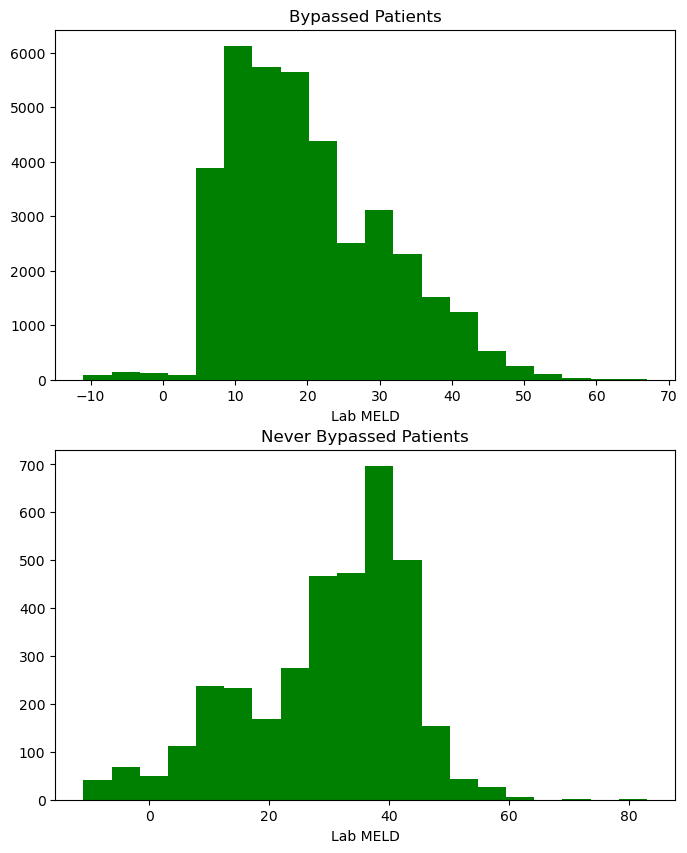

In [224]:
fig, ax = plt.subplots(2, figsize = (8, 10))
ax[0].hist(ldf.query('BYPASSED').FINAL_MELD_PELD_LAB_SCORE, bins=20, color='g')
ax[1].hist(ldf.query('~BYPASSED').FINAL_MELD_PELD_LAB_SCORE, bins=20, color='g')
ax[0].set_xlabel('Lab MELD')
ax[1].set_xlabel('Lab MELD')
ax[0].set_title('Bypassed Patients')
ax[1].set_title('Never Bypassed Patients')
plt.show()

In [116]:
#PTR Sequence # of EP vs Non-EP
#Using matched data from pt survival

In [297]:
matched_livs = matched_data[['DONOR_ID', 'EP']].set_index('DONOR_ID')

In [300]:
seq_list = []
for liv, ep_stat in matched_livs.iterrows():
    ptr_seq_num = ptr.query(f'DONOR_ID == {liv}')['PTR_SEQUENCE_NUM'].max()
    seq_list.append([liv, ptr_seq_num, ep_stat.iloc[0]])
    

In [ ]:
#EP Bypasses over time

In [79]:
df.sort_values(by='Match_date', inplace=True)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_17851/1965213056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Match_date', inplace=True)


In [80]:
df.reset_index(inplace=True)

In [81]:
df.drop(columns='index', inplace=True)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_17851/705726186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='index', inplace=True)


In [83]:
x = df['Match_date'].tolist()

In [85]:
y = np.arange(len(x)) + 1

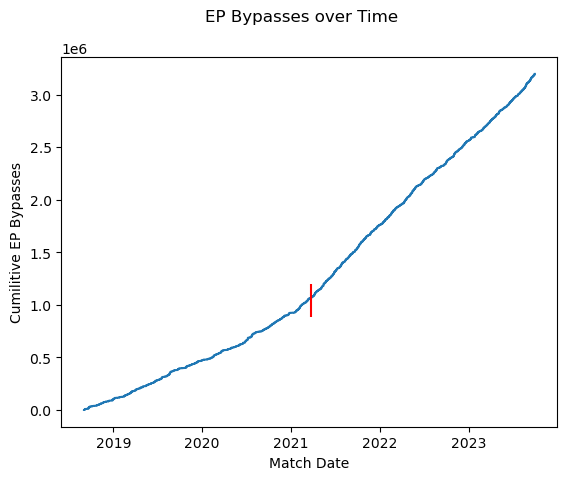

In [91]:
fig, ax = plt.subplots()
ax.plot(x, y)
fig.suptitle('EP Bypasses over Time')
ax.vlines(pd.Timestamp(2021, 3, 25), ymin=0.88e6, ymax= 1.2e6, color='r')
ax.set_xlabel('Match Date')
ax.set_ylabel('Cumilitive EP Bypasses')
plt.show()



In [ ]:
#pre (era=0)

In [97]:
x2.shape[0] / 912.5

4.216986301369863

In [ ]:
#post (era=1)

In [ ]:
#lets try and show this graphically

In [98]:
x = ld.sort_values(by='DON_DATE')['DON_DATE'].unique().tolist() #list of all the dates
num_ep_li = [ep(ld[ld['DON_DATE'] == d], 1).shape[0] for d in x] ## of ep livers on this day
num_ep_tx = [tx(ep(ld[ld['DON_DATE'] == d], 1), 1).shape[0] for d in x]## of ep tx on this day

In [99]:
#group in larger bins so plot looks betetr
i=0
step = 40
x_bin = []
ep_li_bin = []
ep_tx_bin = []
for m in np.arange(len(x) // step):
    times = x[i:i+step]
    unix = [ts.timestamp() for ts in times]
    avg_time = sum(unix) / len(unix)
    x_bin.append(datetime.fromtimestamp(avg_time))
    eplivs = num_ep_li[i:i+step]
    eptxs = num_ep_tx[i:i+step]
    ep_li_bin.append(sum(eplivs) / len(eplivs))
    ep_tx_bin.append(sum(eptxs) / len(eptxs))
    i += step
times = x[i:]
unix = [ts.timestamp() for ts in times]
avg_time = sum(unix) / len(unix)
x_bin.append(datetime.fromtimestamp(avg_time))
eplivs = num_ep_li[i:]
eptxs = num_ep_tx[i:]
ep_li_bin.append(sum(eplivs) / len(eplivs))
ep_tx_bin.append(sum(eptxs) / len(eptxs))



In [100]:
rat = [(t/l)*100 for t,l in zip(ep_tx_bin, ep_li_bin)]

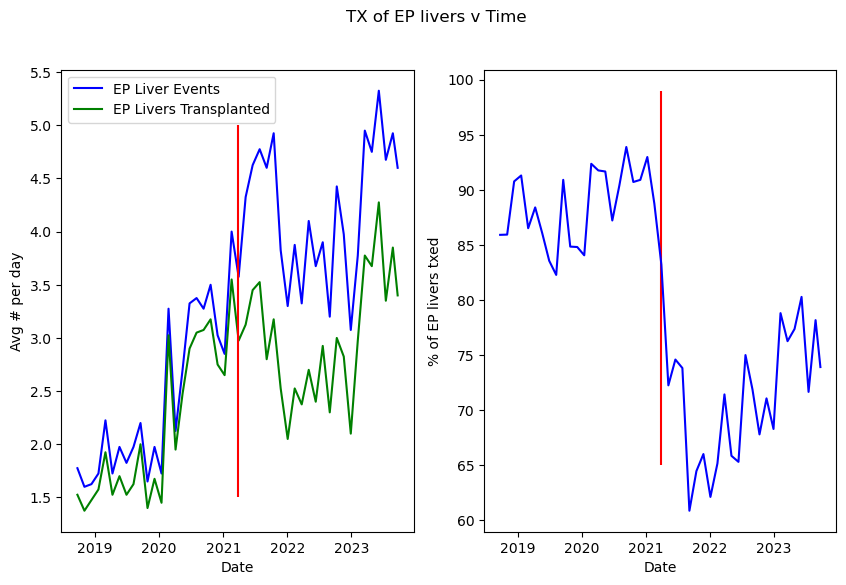

In [102]:
#EP Events, TXed, %
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(x_bin, ep_li_bin, label='EP Liver Events', color = 'b')
ax[0].plot(x_bin, ep_tx_bin, label='EP Livers Transplanted', color='g')
ax[0].vlines(pd.Timestamp(2021, 3, 25), color='r', ymin=1.5, ymax=5)
ax[1].vlines(pd.Timestamp(2021, 3, 25), color='r', ymin=65, ymax=99)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Avg # per day')
ax[1].plot(x_bin, rat, color='b')
ax[1].set_ylabel('% of EP livers txed')
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
fig.suptitle('TX of EP livers v Time')
plt.show()


In [314]:
era(ep(ld, 1), 1).shape[0], era(tx(ep(ld, 1), 1), 1).shape[0], disc(ep(ld, 1), 1).shape[0]

(3848, 2746, 747)

In [91]:
#offers and accepts of EP livers

In [96]:
ep_ptr.query('OFFER_ACCEPT != "B"').shape[0]

1318356

In [95]:
ep_ptr.query('OFFER_ACCEPT == "Y"').shape[0]

2810

## Pt characteristics

### EP vs Non-EP Recips

In [82]:
d = {'als' : 1,
    'bcd' : 2,
    'cde': 3}

In [84]:
d.values()

dict_values([1, 2, 3])

In [75]:
ld['STATUS'] = ld.END_STAT < 6030

In [76]:
ldf['STATUS'] = ldf.END_STAT < 6030

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_32924/1287643114.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldf['STATUS'] = ldf.END_STAT < 6030


In [882]:
ld['ethnicity'] = mf.get_fff(ld, fff, liv_data_dict, col='ETHCAT')
ld.ethnicity = ld.ethnicity.map({
    ' White, Non-Hispanic' : 'White',
    ' Black, Non-Hispanic' : 'Black',
    ' Hispanic/Latino' : 'Hispanic/Latino',
    ' Asian, Non-Hispanic': 'Asian'
})
ld.ethnicity = ld.ethnicity.fillna('Other')

In [55]:
recip_chars = [
    'AGE',
    'ETHCAT',
    'GENDER',
    'DIAG',
    'ABO_MAT',
    'BMI',
    'COLD_ISCH',
    'CREAT_TX',
    'DAYSWAIT_CHRON',
    'EXC_AT_TX',
    'FINAL_MELD_PELD_LAB_SCORE',
    'END_STAT'
    
]

In [1]:
ct = char_table({
    'Standard Allocation' : ep(ld, 0),
    'EP' : ep(ld, 1)
}, cats = [ 'GENDER', 'ethnicity' , 'ABO_MAT', 'STATUS'], skew = ['CREAT_TX' ,'COLD_ISCH'], norm = ['AGE', 'FINAL_MELD_PELD_LAB_SCORE'], pub=True)

NameError: name 'char_table' is not defined

In [884]:
ct

,Standard Allocation,EP,p
n,17873,2551,
AGE,"51.48 (19.96, 83.00)","54.85 (24.39, 85.31)",<0.001
FINAL_MELD_PELD_LAB_SCORE,"25.53 (3.09, 47.97)","17.42 (1.84, 33.00)",<0.001
CREAT_TX,"1.07 [0.76, 1.62]","0.9 [0.71, 1.20]",<0.001
COLD_ISCH,"5.82 [4.73, 7.15]","7.03 [5.48, 9.00]",<0.001
GENDER,,,<0.001
M,11155 (62.41%),1679 (65.82%),
F,6718 (37.59%),872 (34.18%),
ethnicity,,,<0.01
White,12254 (68.56%),1839 (72.09%),


In [44]:
ldf

,ABO,ABO_MAT,AGE,BMI_CALC,COD,COD_WL,COLD_ISCH,COMPOSITE_DEATH_DATE,CREAT_TX,DAYSWAIT_CHRON,...,TXKID,TXLIV,TXLNG,TXPAN,TXVCA,WARM_ISCH_TM_DON,WGT_KG_CALC,WGT_KG_DON_CALC,WL_ID_CODE,LISTYR
0,B,1,55.0,24.218750,4802.0,NaN,13.183327,1999-06-18,1.1,12.0,...,,W,,,,NaN,62.0,67.000000,286513.0,1994.0
1,A,2,45.0,19.948060,4626.0,NaN,12.433327,2017-09-04,1.4,2.0,...,,W,,,,NaN,53.0,49.895161,210599.0,1994.0
2,O,,NaN,NaN,NaN,NaN,NaN,2009-02-26,NaN,886.0,...,,,,,,NaN,NaN,NaN,553932.0,1994.0
3,B,1,56.0,29.320988,4851.0,NaN,6.816666,2001-03-12,1.0,217.0,...,,W,,,,NaN,95.0,79.000000,622363.0,1994.0
4,O,,NaN,NaN,NaN,NaN,NaN,1995-01-18,NaN,324.0,...,,,,,,NaN,NaN,NaN,870643.0,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357264,O,,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2.0,...,,,,,,NaN,NaN,NaN,1769385.0,2023.0
357265,O,,NaN,NaN,NaN,NaN,NaN,NaT,NaN,6.0,...,,,,,,NaN,NaN,NaN,1769822.0,2023.0
357266,O,,NaN,NaN,NaN,NaN,NaN,NaT,NaN,6.0,...,,,,,,NaN,NaN,NaN,1769240.0,2023.0
357267,O,,NaN,NaN,NaN,NaN,NaN,NaT,NaN,6.0,...,,,,,,NaN,NaN,NaN,1768533.0,2023.0


In [91]:
stats([ep(ld, 0), ep(ld, 1)], cats = [ 'GENDER', 'ETHCAT' , 'ABO_MAT'], skew = ['CREAT_TX' ,'COLD_ISCH'], norm = ['AGE', 'MATCH_MELD_PELD'])

AGE                <0.001
MATCH_MELD_PELD    <0.001
CREAT_TX           <0.001
COLD_ISCH          <0.001
GENDER             <0.001
ETHCAT              <0.05
ABO_MAT            <0.001
Name: p, dtype: object

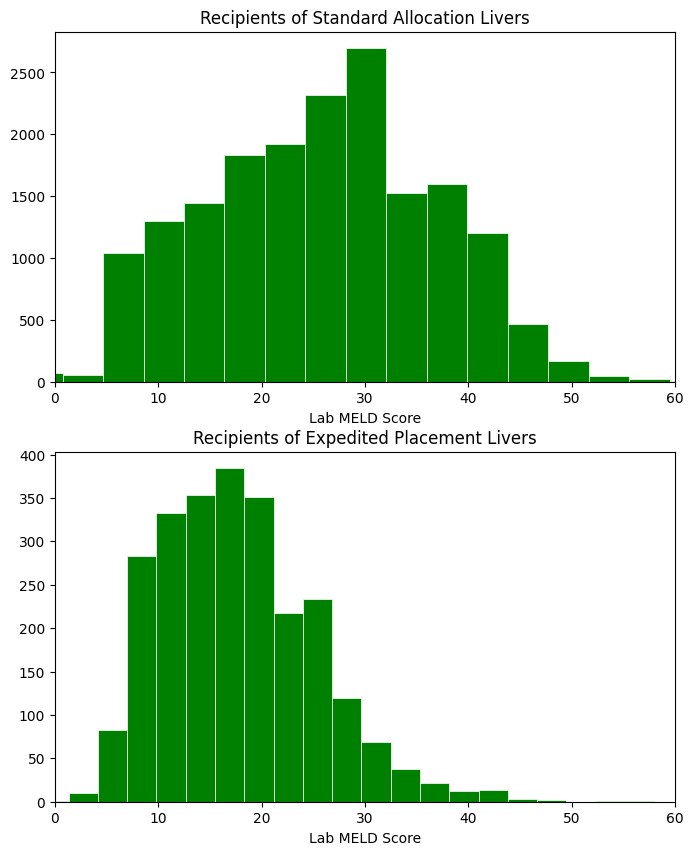

In [511]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].hist(ep(ld, 0).FINAL_MELD_PELD_LAB_SCORE, color='g', bins=24, edgecolor='white', linewidth=0.5)
ax[0].set_title('Recipients of Standard Allocation Livers')
ax[0].set_xlabel('Lab MELD Score')
ax[0].set_xlim([0, 60])
ax[1].hist(ep(ld, 1).FINAL_MELD_PELD_LAB_SCORE, color='g', bins=24, edgecolor='white', linewidth=0.5)
ax[1].set_title('Recipients of Expedited Placement Livers')
ax[1].set_xlabel('Lab MELD Score')
ax[1].set_xlim([0, 60])
plt.savefig('ep_melds.png')
plt.show()


### bypassed vs never

In [ ]:
#end_stat of pts being bypassed

In [71]:
ct = char_table({
    'Bypassed' : ldf.query('BYPASSED'),
    'Never Bypassed' : ldf.query('~BYPASSED')}, cats=['ETHCAT', 'STATUS'])
                               

In [73]:
char_table({
    'bypassed status' : ldf.query('BYPASSED and STATUS')
}, cats=['END_STAT'])

bypassed status
cat      var                   
         n                  632
END_STAT 6012.0    228 (36.08%)
         6011.0    404 (63.92%)

In [72]:
ct

Bypassed Never Bypassed
cat    var                                 
       n               38610           3589
ETHCAT 5.0      1606 (4.16%)    175 (4.88%)
       1.0    26584 (68.85%)   2236 (62.3%)
       4.0     7170 (18.57%)    750 (20.9%)
       2.0      2545 (6.59%)    342 (9.53%)
       9.0       241 (0.62%)     34 (0.95%)
       7.0        66 (0.17%)      6 (0.17%)
       6.0        387 (1.0%)     38 (1.06%)
STATUS False  37978 (98.36%)  3082 (85.87%)
       1.0       632 (1.64%)   507 (14.13%)
ETHCAT 998.0             NaN      8 (0.22%)

In [81]:
ct2 = char_table({
    'Bypassed' : ldf.query('BYPASSED'),
    'Never Bypassed' : ldf.query('~BYPASSED')}, skew=['FINAL_MELD_PELD_LAB_SCORE'])
                               

In [83]:
idx = pd.IndexSlice
ct = ct.sort_index(level=['cat', 'var'], ascending = [True, True])
ct.loc[idx[:, :6012], :]

Bypassed Never Bypassed
cat      var                                  
END_STAT 6011.0     404 (1.05%)   425 (11.84%)
         6012.0     228 (0.59%)     82 (2.28%)
ETHCAT   1.0     26584 (68.85%)   2236 (62.3%)
         2.0       2545 (6.59%)    342 (9.53%)
         4.0      7170 (18.57%)    750 (20.9%)
         5.0       1606 (4.16%)    175 (4.88%)
         6.0         387 (1.0%)     38 (1.06%)
         7.0         66 (0.17%)      6 (0.17%)
         9.0        241 (0.62%)     34 (0.95%)
         998.0              NaN      8 (0.22%)

In [86]:
stats([ldf.query('BYPASSED'), ldf.query('~BYPASSED')], cats=['ETHCAT', 'END_STAT'],
     skew = ['FINAL_MELD_PELD_LAB_SCORE'])

FINAL_MELD_PELD_LAB_SCORE    <0.001
ETHCAT                       <0.001
END_STAT                     <0.001
Name: p, dtype: object

In [115]:
#For bypassed vs not bypassed - how many are getting an EP liver?
char_table({
    'Never Bypassed': ld.query('~BYPASSED'),
    'Bypassed' : ld.query('BYPASSED')
} ,cats=['EP'])

Never Bypassed        Bypassed
cat var                               
    n             2511           17913
EP  0    2359 (93.95%)  15514 (86.61%)
    1      152 (6.05%)   2399 (13.39%)

## codes

In [ ]:
#Lets examine why these organs were bypassed

In [ ]:
bypassed_codes = bdf['PRIME_OPO_REFUSAL_ID'].tolist()

In [ ]:
counter = Counter(bypassed_codes)

In [ ]:
cdict = dict(sorted(counter.items(), key= lambda item: item[1], reverse=True))

In [ ]:
cats = list(cdict.keys())
freq = list(cdict.values())
plt.figure(figsize=(8, 8))
plt.pie(freq, labels=cats, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Bypass proportions by Refusal Code')
plt.show()
per_freq = [(x/len(bypassed_codes))*100 for x in freq ]
for i, code in enumerate(cats):
    try: 
        print(f'{code} '+'('+docs.loc[code]['DESCRIPTION']+')' +f' : {per_freq[i]:.2f}%')
    except KeyError:
        pass

In [ ]:
#compare pre and post eras

In [ ]:
bypassed_codes = era(bdf, 0)['PRIME_OPO_REFUSAL_ID'].dropna().tolist()
counter = Counter(bypassed_codes)
cdict = dict(sorted(counter.items(), key= lambda item: item[1], reverse=True))
cats1 = list(cdict.keys())
freq1 = list(cdict.values())
plt.figure(figsize=(8, 8))
plt.pie(freq1, labels=cats1, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Bypass proportions by Refusal Code - Pre Policy')
plt.show()
per_freq1 = [(x/len(bypassed_codes))*100 for x in freq1 ]
for i, code in enumerate(cats):
    try: 
        print(f'{code} '+'('+docs.loc[code]['DESCRIPTION']+')' +f' : {per_freq1[i]:.2f}%')
    except KeyError:
        pass

In [ ]:
bypassed_codes = era(bdf, 1)['PRIME_OPO_REFUSAL_ID'].dropna().tolist()
counter = Counter(bypassed_codes)
cdict = dict(sorted(counter.items(), key= lambda item: item[1], reverse=True))
cats2 = list(cdict.keys())
freq2 = list(cdict.values())
plt.figure(figsize=(8, 8))
plt.pie(freq2, labels=cats2, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Bypass proportions by Refusal Code - Post Policy')
plt.show()
per_freq2 = [(x/len(bypassed_codes))*100 for x in freq2 ]
for i, code in enumerate(cats):
    try: 
        print(f'{code} '+'('+docs.loc[code]['DESCRIPTION']+')' +f' : {per_freq2[i]:.2f}%')
    except KeyError:
        pass

In [ ]:
#I want to make these pies into stacked bar charts - this is important!
#lets try our hand at Altair

In [116]:
#Why are people refusing EP livers?
ep_ref_codes = ep_ptr.query('OFFER_ACCEPT != "B"').PRIME_OPO_REFUSAL_ID.value_counts()
ep_ref_codes = ep_ref_codes / ep_ref_codes.sum()
ep_ref_codes.index = [docs.loc[c].DESCRIPTION for c in ep_ref_codes.index]

In [118]:
ep_ref_codes.head(10)

Donor age or quality                                      0.217534
Actual or projected cold ischemic time too long           0.165663
Donor age                                                 0.089197
Biopsy results unacceptable                               0.075734
Unacceptable organ specific test results, specify         0.072044
Other, specify                                            0.056799
DCD donor neurological function/not expected to arrest    0.047329
Donor medical history, specify                            0.044964
Organ Preservation                                        0.028684
Organ size, specify                                       0.026983
Name: count, dtype: float64

PRIME_OPO_REFUSAL_ID
830.0    0.217534
712.0    0.165663
700.0    0.089197
715.0    0.075734
717.0    0.072044
           ...   
813.0    0.000025
832.0    0.000015
810.0    0.000008
811.0    0.000004
731.0    0.000002
Name: count, Length: 62, dtype: float64

### altair (failure)

In [ ]:
data1 = pd.DataFrame({
    'code' : cats1,
    'count' : freq1,
    'percent' : per_freq1,
    'desc' : [docs.loc[code]['DESCRIPTION'] for code in cats1]
})
data1['col'] = data1['code'].astype(str)+ ' : ' + data1['desc']
data1['era'] = 'Pre Policy'
data1 = data1[data1['percent'] > 0.1]

In [ ]:
data2 = pd.DataFrame({
    'code' : cats2,
    'count' : freq2,
    'percent' : per_freq2,
    'desc' : [docs.loc[code]['DESCRIPTION'] for code in cats2]
})
data2['col'] = data2['code'].astype(str)+ ' : ' + data2['desc']
data2['era'] = 'Post Policy'
data2 = data2[data2['percent'] > 0.1]

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)

In [ ]:
base = alt.Chart(data).encode(
    order = alt.Order(
        'percent:Q',
        sort = 'descending'
    )
)
bar = base.mark_bar(width = 200, height=400).encode(
    color = 'col:N',
    y = 'sum(percent):Q',
).properties(width='container')

text = base.mark_text(
    align = 'center',
    baseline='middle',
    fontSize = 13,
    fontWeight = 'bold'
    ).encode(
        text = alt.Text('percent:N', format='.2f'),
        y=alt.Y('center:Q'),
        color=alt.value('black'),
        detail = 'col:N',
        order = alt.Order(
        'percent:Q',
        sort = 'descending'
    )
    ).transform_filter(
        alt.datum.percent > 2
    ).transform_window(
    cumulative_sum='sum(percent)',
    groupby=['category', 'type'],
    sort=[alt.SortField('percent', order='descending')]
    ).transform_calculate(
    center='datum.cumulative_sum - datum.percent / 2'
)
chart = (bar+text)
chart

### matplotlib

In [ ]:
#altair was a bust
#matplotlib

In [1140]:
pre_wc = {k:v for k,v in zip(cats1, per_freq1)}
post_wc = {k:v for k,v in zip(cats2, per_freq2)}

In [1153]:
color_dict_codes = {k:v for k,v in zip(cats2, colors)}

In [1142]:
pre_wc = {k:v for k, v in pre_wc.items() if v > 0.5}

In [1143]:
post_wc = {k:v for k, v in post_wc.items() if v > 0.5}

In [ ]:
pre_wc

In [ ]:
post_wc

In [ ]:
color_dict

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


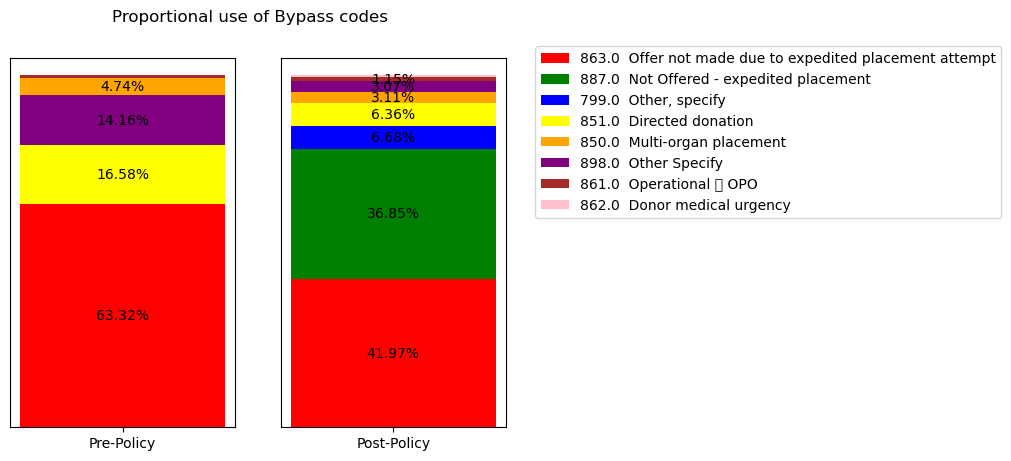

In [1231]:
fig, ax = plt.subplots(1,2)
i=0
bot1 = 0
k=0
bot2=0
width = 0.5
for code, wc in pre_wc.items():
    p = ax[0].bar('Pre-Policy', wc,  width, label=f'{code} ', color = color_dict_codes[code], bottom = bot1)
    bot1 += wc
    i += 1
    ax[0].bar_label(p, fmt = per(wc), label_type='center')
for code, wc in post_wc.items():
    p = ax[1].bar('Post-Policy', wc, width, label=f'{code}  {docs.loc[code].iloc[1]}', color = color_dict_codes[code], bottom = bot2)
    bot2 += wc
    ax[1].bar_label(p, fmt = per(wc), label_type='center')
ax[1].legend(bbox_to_anchor = (1.1, 1.05), fancybox=True)
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
fig.suptitle('Proportional use of Bypass codes')
plt.show()


## regions

In [ ]:
#where are ep livers being placed? by region

In [ ]:
#making stacked bar chart

In [108]:
colors = [
    'red', 'green', 'khaki', 'yellow', 'orange', 'purple', 
    'brown', 'pink', 'gray', 'cyan', 'magenta'
]
color_dict = {k+1:v for k,v in enumerate(colors)}

In [109]:
ep_regs = ep(ld, 1).REGION.dropna().tolist()
reg_regs = ep(ld, 0).REGION.dropna().tolist()

In [110]:
ep_count = Counter(ep_regs)
reg_count = Counter(reg_regs)
ep_count = dict(sorted(ep_count.items(), key=lambda item: item[1], reverse=True))
reg_count = dict(sorted(reg_count.items(), key=lambda item: item[1], reverse=True))

In [111]:
ep_freqs = {k:(v/len(ep_regs)*100) for k,v in ep_count.items() }
reg_freqs = {k:(v/len(reg_regs)*100) for k,v in reg_count.items() }

In [167]:
change_freqs = {}
for i in range(1, 12):
    change_freqs[i] = ep_freqs[i] - reg_freqs[i]

In [173]:
dict(sorted(change_freqs.items(), key=lambda item: item[1], reverse=True))

{10: 9.158213566721235,
 5: 3.2179042415274495,
 2: -0.26598003865550623,
 9: -0.34624055876797666,
 1: -0.43881409631257995,
 3: -0.6134488285887834,
 11: -0.7192828761787506,
 8: -1.1759896686458218,
 7: -2.641115919952929,
 6: -2.6906838205525316,
 4: -3.4845620005938063}

In [180]:
pd.Series(change_freqs).sort_values(ascending=False).to_excel('AAAA_Change_in_Freq.xlsx')

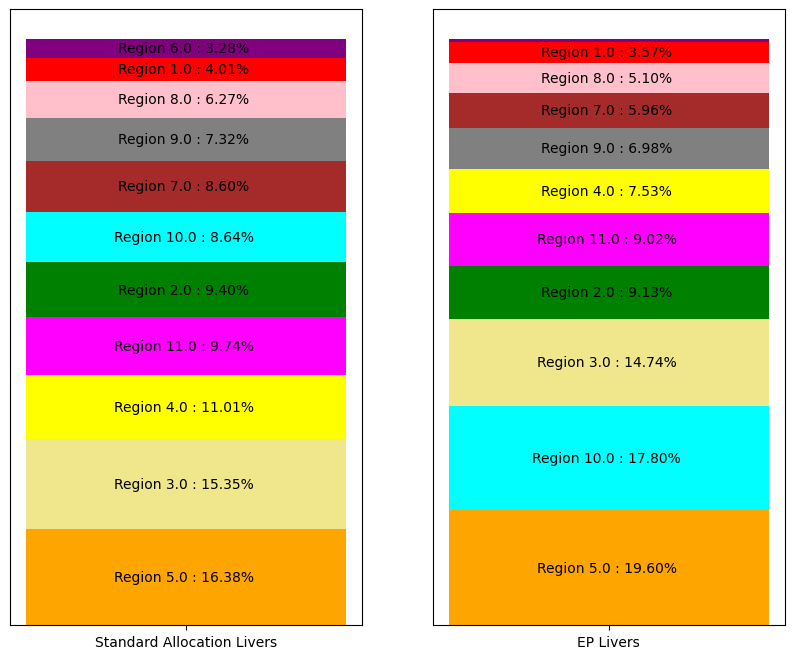

In [157]:
bot1 = 0
bot2 = 0
width = 0.5
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
for reg, wc in ep_freqs.items():
    
    p=ax[1].bar('EP Livers', wc, width, bottom=bot2, color=color_dict[reg], label=f'Region {int(reg)}')
    if reg != 6:
        ax[1].bar_label(p, fmt=f'Region {reg} : {per(wc)} ', label_type='center')
    bot2 += wc
    
for reg, wc in reg_freqs.items():
    p=ax[0].bar('Standard Allocation Livers', wc, width, bottom=bot1, color=color_dict[reg], label=f'Region {int(reg)}')
    
    ax[0].bar_label(p, fmt=f'Region {reg} : {per(wc)} ', label_type='center')
    bot1 += wc



ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

#fig.suptitle('Placement of Livers pre/post policy')
plt.savefig('EP_regionals.png')
plt.show()


## OPOs + Centers

In [ ]:
#Explore initiating OPO of EP matches
#Have to filter down to initiations of EP rather than just counting offers

In [90]:
match_ids = df['MATCH_ID_CODE'].unique().tolist()

In [71]:
ctr_list = ep(ld, 1).CTR_CODE

In [72]:
opo_list = ep(ld, 1).OPO_CTR_CODE

In [95]:
print('Centers:')
ctrs(ctr_list, 50) 
print('OPOs:')
opos(opo_list, 33) 

Centers:
20 / 130 (15.38%) Centers accepted 50.310% (1283 livers) of all transplanted EP grafts
OPOs:
8 / 57 (14.04%) Opos placed 32.970%  (841 livers) of all transplanted EP grafts


In [868]:
ctr_c_ep = ep(ld, 1).CTR_CODE.value_counts()

In [859]:
#Isolate top 20 EP centers
#Characteristics that way

In [870]:
top_ep_ctrs = ctr_c_ep[:20]

In [879]:
top_ep_ctrs

CTR_CODE
07471    142
07223    127
12152    118
13609     75
25110     74
06820     69
14477     65
07161     57
18755     56
19034     54
23839     49
16616     49
20522     49
00124     45
05704     44
21514     43
11749     43
24800     42
02573     42
20677     40
Name: count, dtype: int64

In [877]:
ld['TOP_EP'] = ld.CTR_CODE.isin(top_ep_ctrs.index)

In [872]:
ptr['TOP_EP'] = ptr.LISTING_CTR_CODE.isin(top_ep_ctrs)

In [97]:
ep_ptr['TOP_EP'] = ep_ptr.LISTING_CTR_CODE.isin(top_ep_ctrs)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_85462/213999341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ep_ptr['TOP_EP'] = ep_ptr.LISTING_CTR_CODE.isin(top_ep_ctrs)


In [878]:
ld.TOP_EP.sum()

6210

In [880]:
char_table({
    'Top 20 EP Centers' : ld.query('TOP_EP'),
    'The Rest' : ld.query('~TOP_EP')
}, cats=['EP'], pub=True)

,Top 20 EP Centers,The Rest,p
n,6210,14214,
EP,,,<0.001
0,4927 (79.34%),12946 (91.08%),
1,1283 (20.66%),1268 (8.92%),


In [192]:
#lets find centers + OPOs percent EP for each

In [204]:
sa_ctr_vol = ep(ld, 0).CTR_CODE.value_counts()
ep_ctr_vol = ep(ld, 1).CTR_CODE.value_counts()
tot_ctr_vol = ld.CTR_CODE.value_counts()

In [199]:
sa_opo_vol = ep(ld, 0).OPO_CTR_CODE.value_counts()
ep_opo_vol = ep(ld, 1).OPO_CTR_CODE.value_counts()
tot_opo_vol = ld.OPO_CTR_CODE.value_counts()

In [982]:
tot_ctr_vol.name = 'tot'
ep_ctr_vol.name = 'ep'
ctr_vols = pd.concat([tot_ctr_vol, ep_ctr_vol], axis=1)
ctr_vols.ep = ctr_vols.ep.fillna(0)
ctr_vols['per_ep'] = (ctr_vols.ep / ctr_vols.tot) * 100

In [987]:
ctr_vols = ctr_vols.sort_values(by='per_ep', ascending=False)
char_table({
    'High Intake' : ctr_vols[:20],
    'The Rest' : ctr_vols[20:]
}, skew=['per_ep'])

High Intake            The Rest
cat var                                             
    n                         20                 128
    per_ep  23.11 [21.06, 34.41]  7.25 [3.49, 12.04]

In [231]:
tot_opo_vol.name = 'tot'
ep_opo_vol.name = 'ep'
opo_vols = pd.concat([tot_opo_vol, ep_opo_vol], axis=1)
opo_vols.ep = opo_vols.ep.fillna(0)
opo_vols['per_ep'] = (opo_vols.ep / opo_vols.tot) * 100
opo_vols['tot_pool'] = (opo_vols.tot / 2551) * 100
opo_vols.sort_values(by='per_ep', ascending=False)

,tot,ep,per_ep,tot_pool
OPO_CTR_CODE,,,,
01116,178,70,39.325843,6.977656
03782,273,105,38.461538,10.701686
01209,253,67,26.482213,9.917679
14353,330,70,21.212121,12.936103
00093,164,34,20.731707,6.428851
11811,387,79,20.413437,15.170521
14012,686,140,20.408163,26.891415
15655,259,50,19.305019,10.152881
25389,213,41,19.248826,8.349667


### OPO CTr Relationships (GINI+LORENZ)

In [104]:
ep_opo_ctrs = ld.query('EP == 1').groupby(['OPO_CTR_CODE','CTR_CODE']).size().sort_values(ascending=False).values

In [105]:
sa_opo_ctrs = ld.query('EP == 0').groupby(['OPO_CTR_CODE','CTR_CODE']).size().sort_values(ascending=False).values

In [133]:
cumulative_frequencies

array([0.01023948, 0.01975157, 0.02842435, ..., 0.99988809, 0.99994405,
       1.        ])

In [151]:
len(ep_opo_ctrs)

754

In [159]:
80/754

0.10610079575596817

In [158]:
cumulative_frequencies[79]

0.5029400235201882

In [ ]:
######Revisit this
###Adjust for EP vs standard

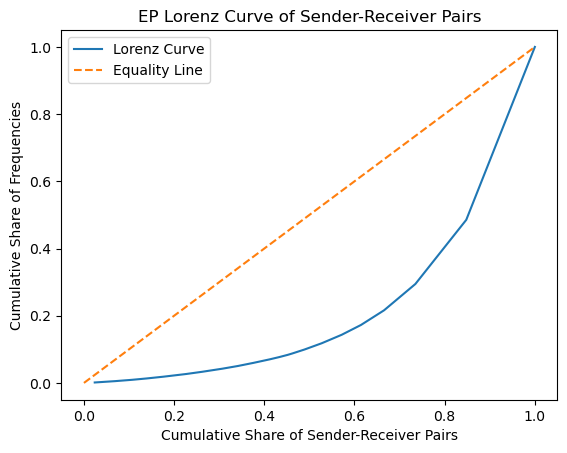

Gini Coefficient: 0.56


In [144]:
cumulative_frequencies = np.cumsum(ep_opo_ctrs) / np.sum(ep_opo_ctrs)
cumulative_pairs = np.arange(1, len(ep_opo_ctrs) + 1) / len(ep_opo_ctrs)
plt.plot( cumulative_frequencies,cumulative_pairs, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Equality Line')
plt.xlabel('Cumulative Share of Sender-Receiver Pairs')
plt.ylabel('Cumulative Share of Frequencies')
plt.title('EP Lorenz Curve of Sender-Receiver Pairs')
plt.legend()
plt.show()
gini_coefficient = 1 - 2 * np.trapz( cumulative_pairs, cumulative_frequencies)
print(f'Gini Coefficient: {gini_coefficient:.2f}')

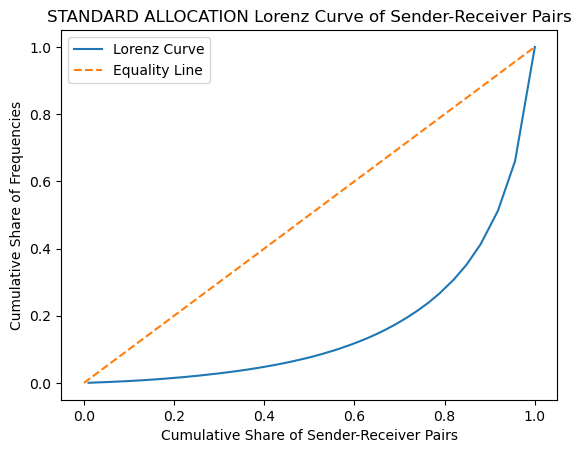

Gini Coefficient: 0.67


In [143]:
cumulative_frequencies = np.cumsum(sa_opo_ctrs) / np.sum(sa_opo_ctrs)
cumulative_pairs = np.arange(1, len(sa_opo_ctrs) + 1) / len(sa_opo_ctrs)
plt.plot( cumulative_frequencies,cumulative_pairs, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Equality Line')
plt.xlabel('Cumulative Share of Sender-Receiver Pairs')
plt.ylabel('Cumulative Share of Frequencies')
plt.title('STANDARD ALLOCATION Lorenz Curve of Sender-Receiver Pairs')
plt.legend()
plt.show()
gini_coefficient = 1 - 2 * np.trapz( cumulative_pairs, cumulative_frequencies)
print(f'Gini Coefficient: {gini_coefficient:.2f}')

### In-Out EP

In [113]:
in_out_ep = ep(ld, 1).groupby(by = ['REGION_dd', 'REGION']).size().reset_index(name='COUNT')

In [114]:
ori_exp_ep = [(o, d) for o, d in zip(ep(ld, 1).REGION_dd, ep(ld, 1).REGION)]

In [115]:
in_out_ep.COUNT.mean()

29.662790697674417

In [116]:
in_out_ep

,REGION_dd,REGION,COUNT
0,1.0,1.0,38
1,1.0,2.0,6
2,1.0,3.0,1
3,1.0,9.0,8
4,1.0,10.0,4
...,...,...,...
81,11.0,5.0,1
82,11.0,7.0,6
83,11.0,9.0,10
84,11.0,10.0,46


In [117]:
t_frame = pd.DataFrame(np.zeros((11, 11)), np.arange(1, 12), columns = np.arange(1, 12))

In [118]:
for i, r in in_out_ep.iterrows():
    c = r.COUNT
    ori = r.REGION_dd
    dest = r.REGION
    t_frame.loc[ori, dest] = c

In [119]:
t_frame

,1,2,3,4,5,6,7,8,9,10,11
1,38.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,3.0
2,14.0,139.0,10.0,1.0,0.0,0.0,6.0,3.0,33.0,55.0,9.0
3,6.0,7.0,280.0,31.0,1.0,0.0,4.0,6.0,12.0,20.0,19.0
4,3.0,1.0,16.0,147.0,40.0,0.0,0.0,9.0,0.0,6.0,0.0
5,0.0,0.0,2.0,2.0,340.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,2.0,73.0,15.0,0.0,3.0,0.0,1.0,2.0
7,0.0,2.0,1.0,2.0,6.0,0.0,112.0,6.0,1.0,17.0,10.0
8,2.0,1.0,9.0,4.0,38.0,0.0,12.0,97.0,0.0,21.0,2.0
9,21.0,21.0,4.0,0.0,0.0,0.0,1.0,0.0,102.0,7.0,10.0
10,3.0,24.0,1.0,0.0,1.0,0.0,11.0,5.0,12.0,276.0,16.0


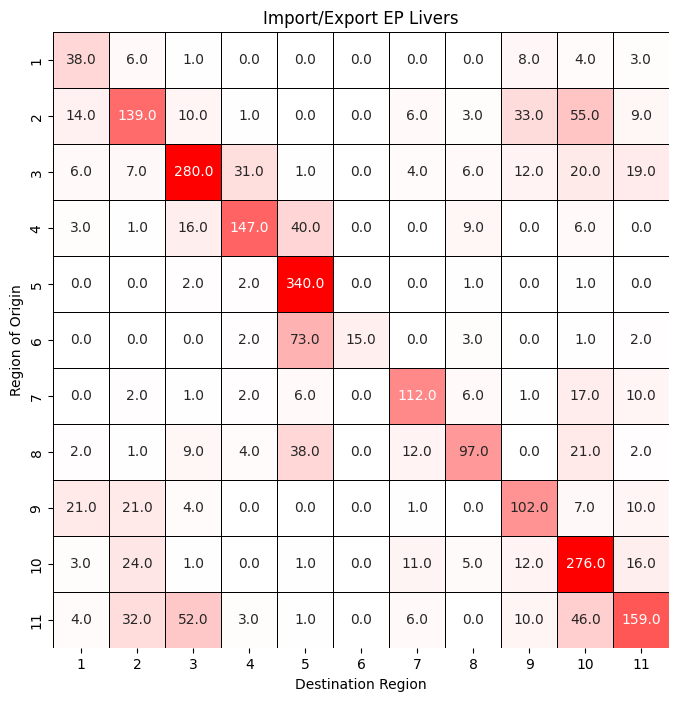

In [120]:
fig, ax = plt.subplots(figsize = (12, 8))
colors = ['white', 'red']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
ax = sb.heatmap(t_frame,
           annot=True,
          linewidths = 0.5,
            linecolor = 'black',
           cmap = cmap,
            vmax = 240,
           #center = 30,
          fmt = '.1f',
          cbar=False,
          square=True)
ax.set_title('Import/Export EP Livers')
ax.set_xlabel('Destination Region')
ax.set_ylabel('Region of Origin')
plt.show()

In [60]:
io_f = t_frame.copy()

In [65]:
for i in range(1, 12):
    io_f.loc[i, i] = 0

In [71]:
io_f.sum(axis=1).sum()

846.0

In [127]:
np.trace(t_frame.values)

1705.0

In [ ]:
```

### All EP liver attempted placements -> will be trickier 

Look at non-bypass offers going out on EP placements 

I.e. [INITIAL_RESPONSE] provisional YES à look at center codes 

Can we only look at non-bypass offers AFTER first EP bypass code? I.e. selected offer below à first B/898 associated code. Can we just look at the non-bypass offers (real offers) after this one and the associated center codes? Will let us look at who is actually getting these offers amidst a field of bypasses 

In [82]:
ep_ptr.drop(columns=['PTR_ROW_ORDER', 'PTR_CLOSE_NUM'], inplace=True)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_59497/1443446970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ep_ptr.drop(columns=['PTR_ROW_ORDER', 'PTR_CLOSE_NUM'], inplace=True)


In [119]:
mr = ep_ptr.query(f'DONOR_ID=={ep_livers[31]}').sort_values(by='PTR_SEQUENCE_NUM').reset_index(drop=True)

In [121]:
#Each mr will be a dataframe
#store in list of dataframes, concat to one at the end
mr_list = []
for i in ep_livers:
    #iterate through match runs
    #mr is the match run
    mr = ep_ptr.query(f'DONOR_ID=={i}').sort_values(by='PTR_SEQUENCE_NUM').reset_index(drop=True)
    #find the first EP bypass in this mr - look at real offers made after that
    first_bp = mr.query('PRIME_OPO_REFUSAL_ID == @codes').index.min()
    try:
        mr = mr[first_bp:]
    except TypeError:
        print(i)
        print(first_bp)
        break
    #now filter down to real offers
    mr = mr.query('OFFER_ACCEPT != "B"')
    mr_list.append(mr)

    
    

In [122]:
real_ep_ptr = pd.concat(mr_list, ignore_index=True, axis=0)

In [763]:
real_ep_ptr.to_stata('REAL_EP_OFFERS.DTA')

In [125]:
#How many centers are getting offers for EP livers?
ep_ptr.query('INITIAL_RESPONSE != "B"').LISTING_CTR_CODE.unique().size

148

In [115]:
#How many centers have placed an EP Organ?
ep_ptr.query('ORGAN_PLACED == @char').LISTING_CTR_CODE.unique().size

131

In [127]:
#How many OPOs are initiating EP placement?
ep_ptr.query('OFFER_ACCEPT != "B"').OPO_CTR_CODE.unique().size

57

In [135]:
ctrs(ep_ptr.query('ORGAN_PLACED == @char').LISTING_CTR_CODE.dropna(), 50)

20 / 131 (15.27%) Centers accepted 50.790% (1427 livers) of all transplanted EP grafts


In [91]:
#what centers are accepting these offers
ctr_cntr = Counter(real_ep_ptr.query('INITIAL_RESPONSE == "Z"')['LISTING_CTR_CODE'])

In [762]:
per_freq = [round(x/sum(ctr_cntr.values())*100, 2) for x in ctr_cntr.values()]
ctrs = {k:v for k,v in zip(ctr_cntr.keys(), per_freq)}
for i in range(5, 20, 5):
    per_placement = sum(sorted(ctrs.values(), reverse=True)[:i])
    print(f'{i} ({(i/len(ctr_cntr.keys()))*100:.3f}%) Centers accepted {per_placement:.3f}% of all EP offers')

5 (3.356%) Centers accepted 17.440% of all EP offers
10 (6.711%) Centers accepted 30.060% of all EP offers
15 (10.067%) Centers accepted 41.250% of all EP offers


### Figure Building

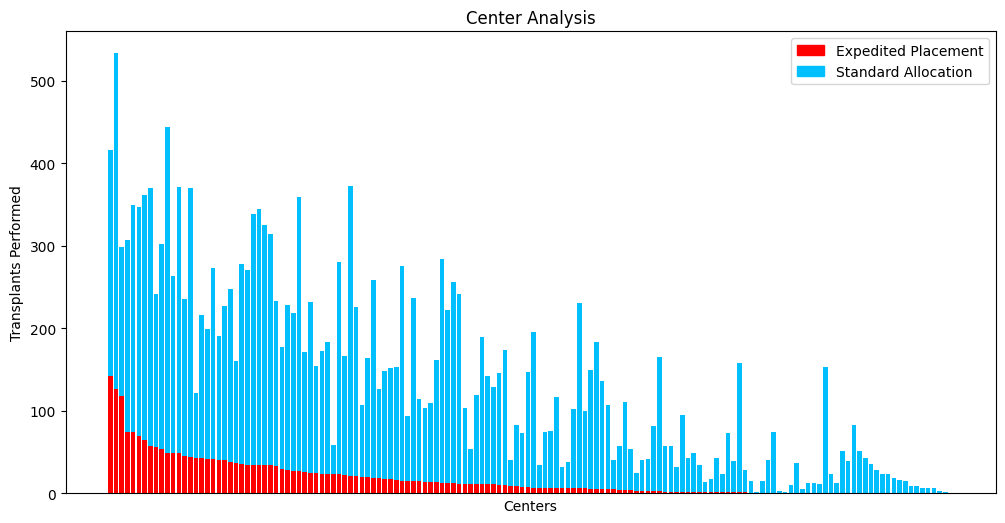

In [220]:
bot_dict = {i:0 for i in sa_ctr_vol.index}
fig, ax = plt.subplots(figsize = (12, 6))
k=0
colors = ['red', 'deepskyblue']
for ser in (ep_ctr_vol, sa_ctr_vol):
    for i, r in ser.items():
        ax.bar(i, r, bottom = bot_dict[i], color=colors[k])
        bot_dict[i] += r
    k += 1
blue_patch = mpatches.Patch(color='deepskyblue', label='Standard Allocation')
red_patch = mpatches.Patch(color='red', label='Expedited Placement')
ax.legend(handles = [red_patch, blue_patch])
ax.set_xticks([])
ax.set_xlabel('Centers')
ax.set_ylabel('Transplants Performed')
plt.title('Center Analysis')
plt.show()

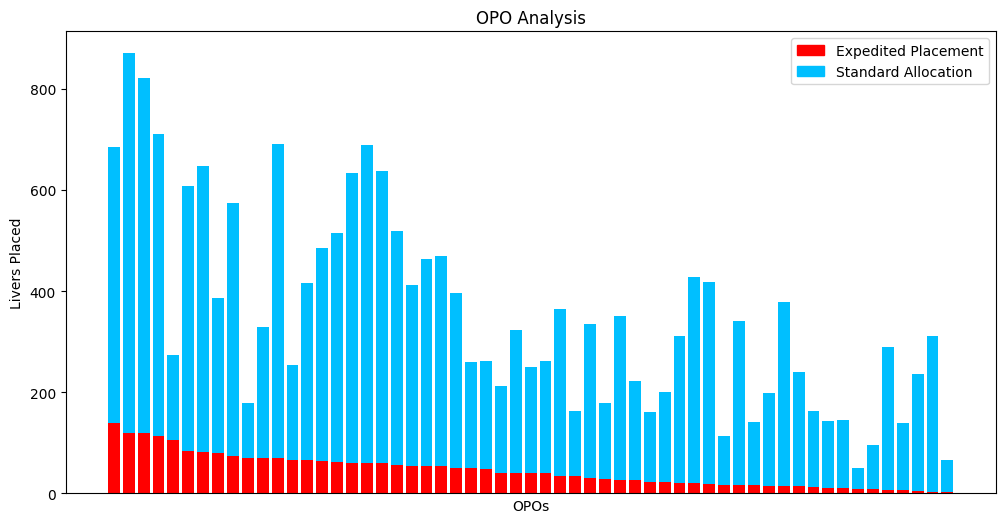

In [223]:
bot_dict = {i:0 for i in sa_opo_vol.index}
fig, ax = plt.subplots(figsize = (12, 6))
k=0
colors = ['red', 'deepskyblue']
for ser in (ep_opo_vol, sa_opo_vol):
    for i, r in ser.items():
        ax.bar(i, r, bottom = bot_dict[i], color=colors[k])
        bot_dict[i] += r
    k += 1
blue_patch = mpatches.Patch(color='deepskyblue', label='Standard Allocation')
red_patch = mpatches.Patch(color='red', label='Expedited Placement')
ax.legend(handles = [red_patch, blue_patch])
ax.set_xticks([])
ax.set_xlabel('OPOs')
ax.set_ylabel('Livers Placed')
plt.title('OPO Analysis')
plt.show()

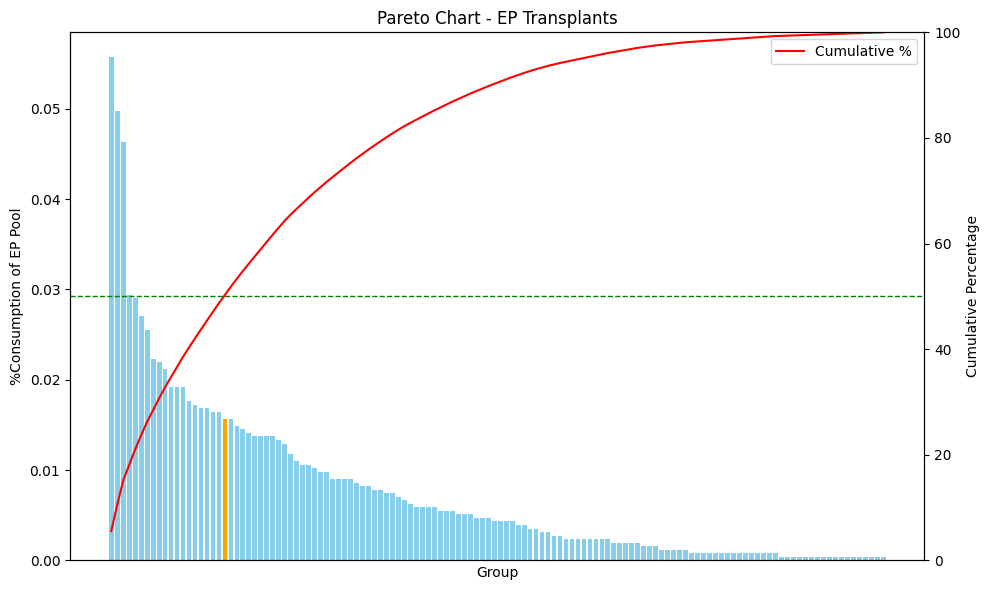

In [853]:
#Pareto
data_df = pd.DataFrame(ep(ld, 1).CTR_CODE.value_counts() / 2551)
data_df = data_df.reset_index()
data_df = data_df.rename(columns = {
    'CTR_CODE' : 'Group',
    'count' : 'Consumption'
})

# Sort by Consumption in descending order
data_df = data_df.sort_values(by='Consumption', ascending=False)

# Calculate cumulative percentage
data_df['Cumulative_Percentage'] = data_df['Consumption'].cumsum() / data_df['Consumption'].sum() * 100

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Consumption
ax1.bar(data_df['Group'], data_df['Consumption'], color='skyblue', label='Consumption')
ax1.set_xlabel('Group')
ax1.set_ylabel('%Consumption of EP Pool')
ax1.set_title('Pareto Chart - EP Transplants')
ax1.tick_params(axis='y')
ax1.set_xticks([])
# Line chart for Cumulative Percentage
ax2 = ax1.twinx()
ax2.plot(data_df['Group'], data_df['Cumulative_Percentage'], color='red', label='Cumulative %')
ax2.axhline(50, color='green', linestyle='--', linewidth=1)  # Highlight 50% line
ax2.set_ylabel('Cumulative Percentage')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 100)


# Add legends

ax2.legend(loc='upper right')

# Highlight the 15% group contributing to 50%
for i, cumulative in enumerate(data_df['Cumulative_Percentage']):
    if cumulative >= 50:
        ax1.bar(data_df['Group'][i], data_df['Consumption'][i], color='orange')
        break

plt.tight_layout()
plt.show()

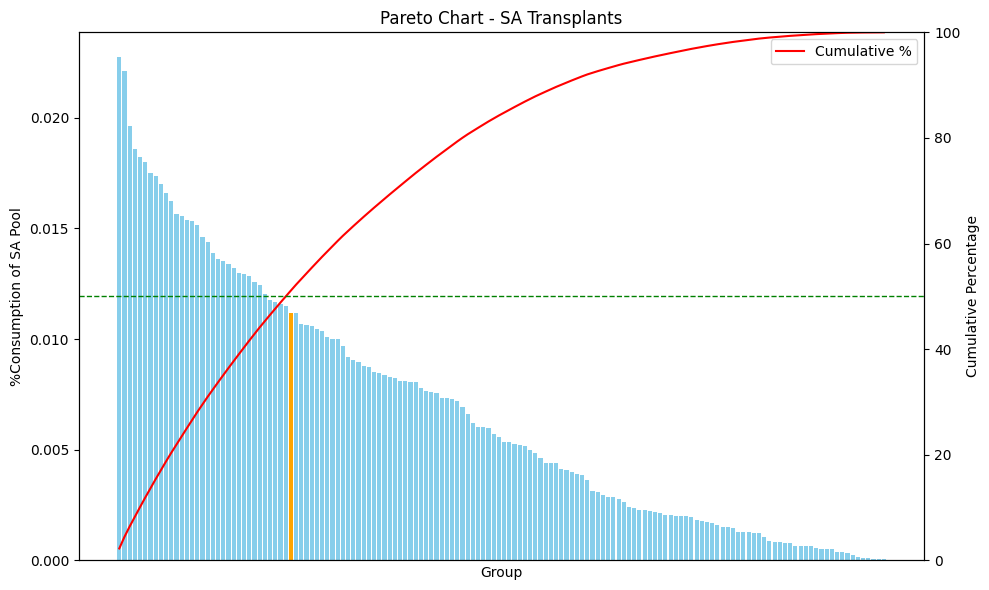

In [854]:
#Pareto
data_df = pd.DataFrame(ep(ld, 0).CTR_CODE.value_counts() / ep(ld, 0).CTR_CODE.value_counts().sum())
data_df = data_df.reset_index()
data_df = data_df.rename(columns = {
    'CTR_CODE' : 'Group',
    'count' : 'Consumption'
})

# Sort by Consumption in descending order
data_df = data_df.sort_values(by='Consumption', ascending=False)

# Calculate cumulative percentage
data_df['Cumulative_Percentage'] = data_df['Consumption'].cumsum() / data_df['Consumption'].sum() * 100

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Consumption
ax1.bar(data_df['Group'], data_df['Consumption'], color='skyblue', label='Consumption')
ax1.set_xlabel('Group')
ax1.set_ylabel('%Consumption of SA Pool')
ax1.set_title('Pareto Chart - SA Transplants')
ax1.tick_params(axis='y')
ax1.set_xticks([])
# Line chart for Cumulative Percentage
ax2 = ax1.twinx()
ax2.plot(data_df['Group'], data_df['Cumulative_Percentage'], color='red', label='Cumulative %')
ax2.axhline(50, color='green', linestyle='--', linewidth=1)  # Highlight 50% line
ax2.set_ylabel('Cumulative Percentage')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 100)


# Add legends

ax2.legend(loc='upper right')

# Highlight the 15% group contributing to 50%
for i, cumulative in enumerate(data_df['Cumulative_Percentage']):
    if cumulative >= 50:
        ax1.bar(data_df['Group'][i], data_df['Consumption'][i], color='orange')
        break

plt.tight_layout()
plt.show()

## Donor Characteristics

In [ ]:
#Donor characteristics

In [767]:
ld['donor_ethnicity'] = mf.get_fff(ld, fff, don_data_dict, col='ETHCAT_DON')
ld.donor_ethnicity = ld.donor_ethnicity.map({
    ' White, Non-Hispanic' : 'White',
    ' Black, Non-Hispanic' : 'Black',
    ' Hispanic/Latino' : 'Hispanic/Latino',
    ' Asian, Non-Hispanic': 'Asian'
})
ld.donor_ethnicity = ld.donor_ethnicity.fillna('Other')
ld.NON_HRT_DON = ld.NON_HRT_DON.map({
    'N' : '0',
    'Y' : '1'
}).fillna('0').astype('int')

In [59]:
don_cols = [
    'NON_HRT_DON',
    'AGE_DON',
    'COD_CAD_DON',
    'LITYP',
    'MACRO_FAT_LI_DON',
    'SGOT_DON',
    'COLD_ISCH',
    'ETHCAT_DON',
    'HGT_CM_DON_CALC',
    'SHARE_TY',
    'DRI'
    
]

In [486]:
categoricals = [
    'NON_HRT_DON',
    'donor_ethnicity',
    'COD_CAD_DON',
    'SHARE_TY',
    'GENDER_DON',
    'LI_MACHINE_PERFUSION'
]

In [487]:
normal = [
    'AGE_DON',
    'HGT_CM_DON_CALC'
]

In [488]:
skew = [
    'MACRO_FAT_LI_DON',
    'SGOT_DON',
    'COLD_ISCH',
    'DRI'
]

In [922]:
ct = char_table({
    'EP Livers ' : tx(ep(ld, 1), 1),
    'Standard Allocation Livers ' : tx(ep(ld, 0), 1)
}, norm=normal, skew=skew, cats = categoricals, pub=True)
ct

,EP Livers,Standard Allocation Livers,p
n,2390,17632,
AGE_DON,"43.38 (9.60, 77.16)","41.43 (8.23, 74.63)",<0.001
HGT_CM_DON_CALC,"169.7 (142.80, 196.60)","169.3 (137.00, 201.60)",0.25
MACRO_FAT_LI_DON,"5.0 [0.00, 15.00]","5.0 [0.00, 10.00]",<0.001
SGOT_DON,"43.0 [24.00, 90.00]","40.0 [23.00, 79.00]",<0.001
COLD_ISCH,"7.03 [5.44, 9.02]","5.8 [4.73, 7.13]",<0.001
DRI,"1.9 [1.58, 2.33]","1.87 [1.59, 2.26]",0.07
NON_HRT_DON,,,0.47
0,2091 (87.49%),15329 (86.94%),
1,299 (12.51%),2303 (13.06%),


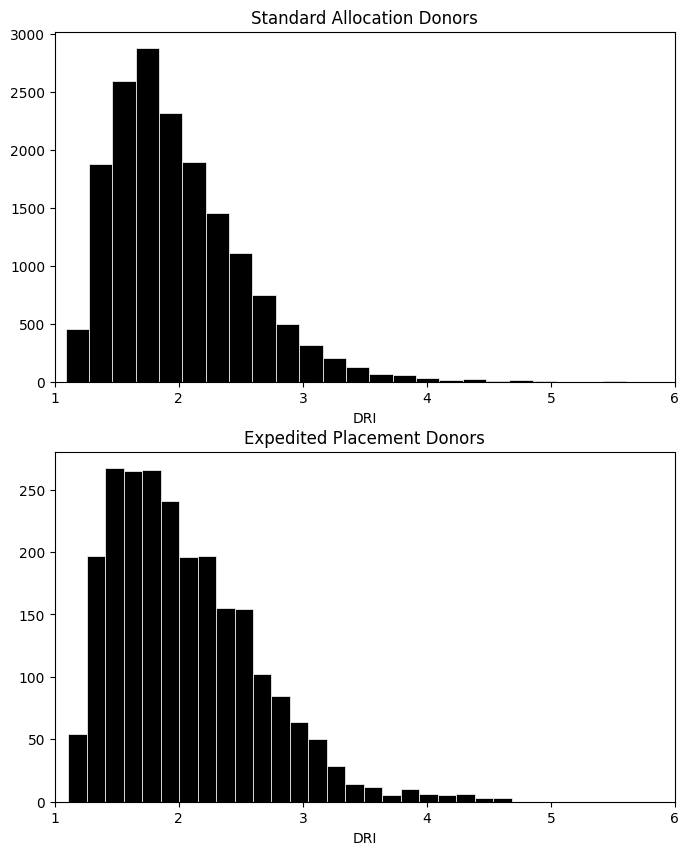

In [480]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].hist(ep(ld, 0).DRI, color='black', bins=24, edgecolor='white', linewidth=0.5)
ax[0].set_title('Standard Allocation Donors')
ax[0].set_xlabel('DRI')
ax[0].set_xlim([1, 6])
ax[1].hist(ep(ld, 1).DRI, color='black', bins=24, edgecolor='white', linewidth=0.5)
ax[1].set_title('Expedited Placement Donors')
ax[1].set_xlabel('DRI')
ax[1].set_xlim([1, 6])

plt.show()


<Axes: xlabel='DRI', ylabel='Count'>

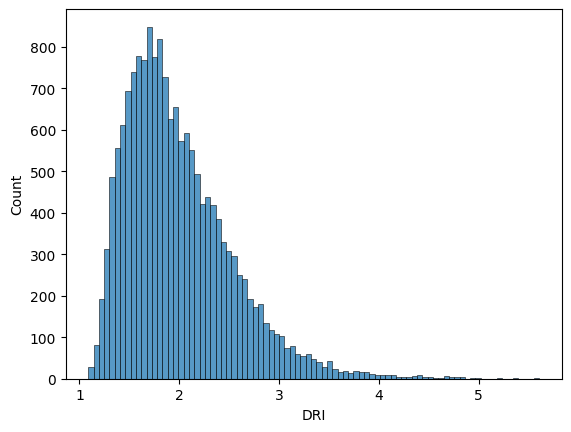

In [469]:
sb.histplot(data=ep(ld, 0), x='DRI')

<Axes: xlabel='FINAL_MELD_PELD_LAB_SCORE', ylabel='Density'>

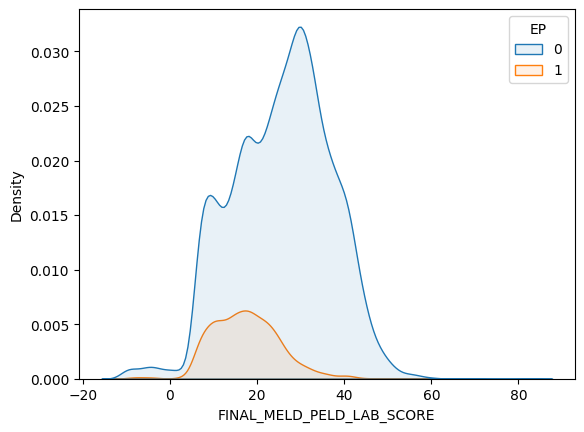

In [473]:
sb.kdeplot(data = ld, x='FINAL_MELD_PELD_LAB_SCORE', hue='EP', fill=True, alpha=0.1)

In [447]:
ld.DRI.kde

AttributeError: 'Series' object has no attribute 'kde'

In [66]:
#ct.to_excel('EP_LIVS_DON_CHARS.xlsx', index=True)

In [64]:
stats([ep(ld, 1), ep(ld, 0)], cats=categoricals, norm=normal, skew=skew)

AGE_DON                  <0.05
HGT_CM_DON_CALC           0.16
MACRO_FAT_LI_DON        <0.001
SGOT_DON                 <0.01
COLD_ISCH               <0.001
DRI                     <0.001
NON_HRT_DON               0.24
ETHCAT_DON                0.38
COD_CAD_DON               0.73
SHARE_TY                <0.001
GENDER_DON                0.68
LI_MACHINE_PERFUSION    <0.001
Name: p, dtype: object

## Pt Survival & outcomes

### Matching

In [601]:
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import cdist

In [ ]:
##Re do this here

In [763]:
ld['split'] = ld.TXLIV.map({'W' : 0, 'S' : 1})

In [764]:
matching_covariates = [
    'NON_HRT_DON',
    'AGE_DON',
    'COLD_ISCH',
    'SHARE_TY',
    'split',
    'FINAL_MELD_PELD_LAB_SCORE',
    'AGE'
]

In [772]:
X = ld[matching_covariates + ['EP']].dropna()
y = X.EP
treated = ep(X, 1)
control =  ep(X, 0)
X = X.drop(columns='EP')


In [773]:
cov_matrix = np.cov(X, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [774]:
distances = cdist(treated, control, metric = 'mahalanobis', VI = inv_cov_matrix)

In [820]:
treated_indices = np.array(y[y == 1].index)
control_indices = np.array(y[y == 0].index)

In [822]:
distances_df = pd.DataFrame(distances, index = treated_indices, columns = control_indices)

In [823]:
matched_controls = set()
matches = []
for i, r in distances_df.iterrows():
    r = r[~r.index.isin(matched_controls)]
    if not r.empty:
        best_control = r.idxmin()
        best_distance = r.min()
        matches.append((i, best_control, best_distance))
        matched_controls.add(best_control)
        
    
    

In [824]:
matches_df = pd.DataFrame(matches, columns = ['EP', 'SA', 'Dist'])

In [825]:
matched_sa = matches_df['SA'].to_list()
matched_ep = matches_df['EP'].to_list()

In [826]:
matches_df

,EP,SA,Dist
0,5,6574,0.126418
1,7,14284,0.097709
2,8,11548,0.050266
3,10,6601,0.067971
4,12,3264,0.050314
...,...,...,...
2381,20141,7458,0.080863
2382,20189,403,0.110620
2383,20191,13949,0.032540
2384,20260,3007,0.069159


### Calculations

In [685]:
pts_1yr_dead = ld.query('PX_STAT == "D" & PTIME < 365').index

In [686]:
gft_1yr_dead = ld.query('PX_STAT == "R" & GTIME < 365').index

In [786]:
ld['1yr_surv_p'] = (ld.PX_STAT == 'D') & (ld.PTIME < 365)

In [796]:
ld['1yr_surv_p'] = (~ld['1yr_surv_p']).astype('int')

In [798]:
ld['1yr_surv_g'] = ((ld.PX_STAT == 'R') & (ld.GTIME < 365)) | (~ld['1yr_surv_p'].astype('bool'))
ld['1yr_surv_g'] = ld['1yr_surv_g'].astype('int')

In [790]:
cats = ['1yr_surv_p',
       '1yr_surv_g']

In [827]:
matched_data = ld.loc[matched_sa + matched_ep]

In [828]:
ct = char_table({
    'EP Livers' : ep(matched_data, 1),
    'Non EP Livers' : ep(matched_data, 0)
}, cats=cats, skew=['PTR_SEQUENCE_NUM'], pub=True)

In [829]:
ct

,EP Livers,Non EP Livers,p
n,2386,2386,
PTR_SEQUENCE_NUM,"140.5 [42.00, 729.75]","10.0 [4.00, 26.00]",<0.001
1yr_surv_p,,,<0.01
1,2284 (95.73%),2241 (93.92%),
0,102 (4.27%),145 (6.08%),
1yr_surv_g,,,<0.05
0,2241 (93.92%),2198 (92.12%),
1,145 (6.08%),188 (7.88%),


In [ ]:
#Outcomes of high-MELD + Status patients

## Post CC

In [95]:
unique_donor_index = ld.DONOR_ID.drop_duplicates().index

In [96]:
ep_ptr = ep_ptr.merge(ld.loc[unique_donor_index][['DONOR_ID', 'CLAMP_DATE', 'CLAMP_TIME']], how='left', on='DONOR_ID', validate='m:1')

In [97]:
ep_ptr['post_cc'] = (ep_ptr.CLAMP_DATE >= ep_ptr.INITIAL_RESPONSE_DATE) & (ep_ptr.CLAMP_TIME > ep_ptr.INITIAL_RESPONSE_TIME)

In [98]:
post_cc_donors = ep_ptr.query('post_cc and OFFER_ACCEPT == "Y"').DONOR_ID.unique()
ld['post_cc'] = ld.DONOR_ID.isin(post_cc_donors)

In [100]:
#donors
ct = mf.char_table({
    'Pre Cross Clamp' : ep(ld, 1).query('~post_cc'),
    'Post Cross Clamp' : ld.query('post_cc')
}, norm=normal, skew=skew, cats = categoricals, pub=True)
ct

NameError: name 'normal' is not defined

In [101]:
ld.query('post_cc').LI_MACHINE_PERFUSION.value_counts()

LI_MACHINE_PERFUSION
N    1030
Y     100
       39
Name: count, dtype: int64

In [102]:
cc_ctr_list = ld.query('post_cc').CTR_CODE
cc_opo_list = ld.query('post_cc').OPO_CTR_CODE

In [103]:
ctrs(ctr_list, 50)
opos(opo_list, 33)

NameError: name 'ctr_list' is not defined

In [107]:
ctrs(cc_ctr_list, 50)
opos(cc_opo_list, 35)

19 / 115 (16.52%) Centers accepted 49.710% (581 livers) of all transplanted EP grafts
8 / 57 (14.04%) Opos placed 34.990%  (409 livers) of all transplanted EP grafts


In [105]:
c = ld.ETHCAT_DON.value_counts() 

In [116]:
c.values

array([12447,  3906,  3218,   554,   158,    77,    60,     3])

In [308]:
placed_livs = ptr.query('ORGAN_PLACED == @char').DONOR_ID.unique().tolist()

In [309]:
ptr.query('DONOR_ID == @placed_livs').shape[0]

2859987

44544

41554

## MVR

In [233]:
#first we will run univariate analysis on all covariates to assess
#Start with donor

In [955]:
donor_covariates = [
    'NON_HRT_DON',
    'AGE_DON',
    'COD_CAD_DON',
   # 'LITYP',
    'BMI_DON_CALC',
    'donor_ethnicity',
    'GENDER_DON',
    'HGT_CM_DON_CALC',
   # 'COLD_ISCH'
    
]

In [339]:
ld['donor_ethnicity'] = pd.Categorical(
    ld['donor_ethnicity'],
    categories=['White', 'Black', 'Hispanic/Latino', 'Asian', 'Other'],  # Explicitly set category order
    ordered=True
)

In [412]:
ld.GENDER_DON = pd.Categorical(
    ld.GENDER_DON,
    categories = ['M', 'F'],
    ordered = True
)

In [956]:
ld_ohe = pd.get_dummies(ld[donor_covariates + ['EP']], drop_first=True)

In [957]:
ld_ohe = ld_ohe.dropna()

In [958]:
ld_ohe = ld_ohe.astype({col : 'int' for col in ld_ohe.select_dtypes(include = 'bool').columns})

In [959]:
y = ld_ohe.EP
X = ld_ohe.drop(columns = 'EP')
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.364321
         Iterations 6


In [960]:
ORs = np.exp(result.params)
ORs.name = 'OR'
CI = np.exp(result.conf_int())
CI.columns = ['2.5%', '97.5%']
p_values = result.pvalues
p_values.name = 'p'
don_mvr = pd.concat([ORs, CI, p_values], axis=1)


In [961]:
#inputting factors for age and BMI
#age isnt even significant so forget about it
#bmi x 5
don_mvr.loc['BMI_DON_CALC', 'OR'] = np.exp(0.0104 * 5)
don_mvr.loc['BMI_DON_CALC', '2.5%'] = np.exp(0.004 * 5)
don_mvr.loc['BMI_DON_CALC', '97.5%'] = np.exp(0.017 * 5)

In [962]:
don_mvr

,OR,2.5%,97.5%,p
const,0.064730,0.035767,0.117146,1.496158e-19
NON_HRT_DON,0.975670,0.856269,1.111720,7.115210e-01
AGE_DON,1.005969,1.003222,1.008723,1.987446e-05
COD_CAD_DON,1.000147,0.999855,1.000439,3.236653e-01
BMI_DON_CALC,1.053376,1.020201,1.088717,3.592807e-06
HGT_CM_DON_CALC,1.000505,0.997072,1.003949,7.736086e-01
donor_ethnicity_Black,0.990447,0.749274,1.309248,9.462468e-01
donor_ethnicity_Hispanic/Latino,1.050208,0.792284,1.392099,7.333352e-01
donor_ethnicity_Other,1.306891,0.863388,1.978211,2.057069e-01
donor_ethnicity_White,0.967440,0.740908,1.263233,8.078542e-01


In [931]:
#Let me do this with just DRI
ld_ohe = pd.get_dummies(ld[['DRI',
                            'BMI_DON_CALC'
                            
                            ,'EP']], drop_first=True)
ld_ohe = ld_ohe.dropna()
y = ld_ohe.EP
X = ld_ohe.drop(columns = 'EP')
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
ORs = np.exp(result.params)
ORs.name = 'OR'
CI = np.exp(result.conf_int())
CI.columns = ['2.5%', '97.5%']
p_values = result.pvalues
p_values.name = 'p'
don_mvr = pd.concat([ORs, CI, p_values], axis=1)


Optimization terminated successfully.
         Current function value: 0.365071
         Iterations 6


In [945]:
don_mvr

,OR,2.5%,97.5%,p
const,0.061823,0.048320,0.079101,1.387502e-108
DRI,1.155135,1.065720,1.252053,4.508046e-04
BMI_DON_CALC,1.017730,1.011478,1.024021,2.275313e-08


In [933]:
recipient_covariates = [
    'AGE',
    'ethnicity',
    'FINAL_MELD_PELD_LAB_SCORE',
    'DAYSWAIT_CHRON',
    'EP'
]

In [934]:
ld['ethnicity'] = pd.Categorical(
    ld['ethnicity'],
    categories=['White', 'Black', 'Hispanic/Latino', 'Asian', 'Other'],  # Explicitly set category order
    ordered=True
)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_67305/482366633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld['ethnicity'] = pd.Categorical(


In [935]:
ld.GENDER = pd.Categorical(
    ld.GENDER,
    categories = ['M', 'F'],
    ordered = True
)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_67305/2859146042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld.GENDER = pd.Categorical(


In [936]:
ld_ohe = pd.get_dummies(ld[recipient_covariates], drop_first = True)
ld_ohe = ld_ohe.dropna()
ld_ohe = ld_ohe.astype({col : 'int' for col in ld_ohe.select_dtypes(include = 'bool').columns})

In [937]:
y = ld_ohe.EP
X = ld_ohe.drop(columns = 'EP')
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.330371
         Iterations 7


In [938]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     EP   No. Observations:                20021
Model:                          Logit   Df Residuals:                    20013
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.09655
Time:                        17:16:38   Log-Likelihood:                -6614.4
converged:                       True   LL-Null:                       -7321.2
Covariance Type:            nonrobust   LLR p-value:                4.148e-301
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4346      0.104    -13.845      0.000      -1.638      -1.231
AGE                           0.0198      0.002     12.304      0.000       0.017       0.023
FINAL_MELD_PELD_LAB_SCORE    -0.0743      0.002    -31.229      0.000      -0.079      -0.070
DAYSWAIT_CHRON             5.208e-05   5.29e-05      0.984      0.325   -5.17e-05       0.000
ethnicity_Black              -0.1576      0.100     -1.580      0.114      -0.353       0.038
ethnicity_Hispanic/Latino    -0.1952      0.063     -3.116      0.002      -0.318      -0.072
ethnicity_Asian              -0.4515      0.121     -3.734      0.000      -0.688      -0.215
ethnicity_Other              -0.2868      0.199     -1.440      0.150      -0.677       0.104
=============================================================================================
"""

In [939]:
ORs = np.exp(result.params)
ORs.name = 'OR'
CI = np.exp(result.conf_int())
CI.columns = ['2.5%', '97.5%']
p_values = result.pvalues
p_values.name = 'p'
rec_mvr = pd.concat([ORs, CI, p_values], axis=1)


In [940]:
rec_mvr.loc['AGE', 'OR'] = np.exp(10*0.0134)
rec_mvr.loc['AGE', '2.5%'] = np.exp(10*0.011)
rec_mvr.loc['AGE', '97.5%'] = np.exp(10*0.016)

In [941]:
#rec_mvr.loc['DAYSWAIT_CHRON', 'OR'] = np.exp(10*0.0004)
#rec_mvr.loc['DAYSWAIT_CHRON', '2.5%'] = np.exp(10*0.000292)
#rec_mvr.loc['DAYSWAIT_CHRON', '97.5%'] = np.exp(10*0.000462)

In [942]:
rec_mvr

,OR,2.5%,97.5%,p
const,0.238222,0.194439,0.291864,1.367170e-43
AGE,1.143393,1.116278,1.173511,8.640333e-35
FINAL_MELD_PELD_LAB_SCORE,0.928424,0.924106,0.932761,4.333086e-214
DAYSWAIT_CHRON,1.000052,0.999948,1.000156,3.251671e-01
ethnicity_Black,0.854231,0.702619,1.038558,1.140042e-01
ethnicity_Hispanic/Latino,0.822670,0.727628,0.930125,1.830627e-03
ethnicity_Asian,0.636674,0.502338,0.806934,1.883978e-04
ethnicity_Other,0.750691,0.508068,1.109175,1.499418e-01


# Freestyle

In [497]:
#lets find something we KNOW is EP - code 887
tru_ep = bdf.query('PRIME_OPO_REFUSAL_ID == 887').DONOR_ID.unique()

In [502]:
tru_ep.size

1288

In [507]:
sl = []
for i in range(tru_ep.size):
    size = ptr.query(f'DONOR_ID == @tru_ep[{i}]').shape[0]
    sl.append(size)
    

In [513]:
ld.TXLIV.unique()

array(['W', 'S'], dtype=object)